In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import re
import copy
import math

%matplotlib inline

# Day 1
## Part 1

In [16]:
df = pd.read_csv("data/input1.txt", header=None, names=["Expense"])

In [17]:
df

,Expense
0,1287
1,1366
2,1669
3,1724
4,1338
...,...
195,1862
196,1430
197,1793
198,1901


In [18]:
def sum2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            if data[i] + data[j] == 2020:
                print(data[i], data[j])
                return data[i] * data[j]

In [19]:
sample = [1721, 979, 366, 299, 675, 1456]
sum2020(sample)

1721 299


514579

In [20]:
sum2020(df["Expense"].values)

437 1583


691771

## Part 2

In [21]:
def sumthree2020(data):
    for i in range(len(data)):
        for j in range(i, len(data)):
            for k in range(j, len(data)):
                if data[i] + data[j] + data[k] == 2020:
                    print(data[i], data[j], data[k])
                    return data[i] * data[j] * data[k]

In [22]:
sample = [1721, 979, 366, 299, 675, 1456]
sumthree2020(sample)

979 366 675


241861950

In [23]:
sumthree2020(df["Expense"].values)

717 335 968


232508760

# Day 2
## Part 1

In [24]:
sample = ["1-3 a: abcde", "1-3 b: cdefg", "2-9 c: ccccccccc"]

In [25]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        t = pieces[2].count(pieces[1][0])
        low, high = [int(x) for x in pieces[0].split("-")]
        if low <= t <= high:
            count += 1
    return count

In [26]:
num_valid(sample)

2

In [27]:
fin = open("data/input2.txt")
data = fin.readlines()
fin.close()

In [28]:
num_valid(data)

636

## Part 2

In [29]:
def num_valid(pwords):
    count = 0
    for p in pwords:
        pieces = p.split()
        first, second = [int(x) - 1 for x in pieces[0].split("-")]
        nw = pieces[2][first] + pieces[2][second]
        c = pieces[1][0]
        if nw.count(c) == 1:
            count += 1
    return count

In [30]:
num_valid(sample)

1

In [31]:
num_valid(data)

588

# Day 3
## Puzzle 1

In [32]:
sample = ["..##.......",
"#...#...#..",
".#....#..#.",
"..#.#...#.#",
".#...##..#.",
"..#.##.....",
".#.#.#....#",
".#........#",
"#.##...#...",
"#...##....#",
".#..#...#.#",
]

In [33]:
sample

['..##.......',
 '#...#...#..',
 '.#....#..#.',
 '..#.#...#.#',
 '.#...##..#.',
 '..#.##.....',
 '.#.#.#....#',
 '.#........#',
 '#.##...#...',
 '#...##....#',
 '.#..#...#.#']

In [34]:
def num_trees(right, down, trees):
    count = 0
    loc = [0, 0]
    while loc[0] < len(trees):
        loc[0] += down
        loc[1] += right
        loc[1] %= len(trees[0])
        if loc[0] < len(trees):
            #print(loc, trees[loc[0]][loc[1]])
            if trees[loc[0]][loc[1]] == "#":
                count += 1
    return count

In [35]:
num_trees(3, 1, sample)

7

In [36]:
fin = open("data/input3.txt")
treemap = [line.strip() for line in fin.readlines()]
fin.close()

In [37]:
num_trees(3, 1, treemap)

191

## Part 2

In [38]:
slopes = [(1, 1), (3, 1), (5, 1), (7, 1), (1, 2)]

In [39]:
def all_paths(slope_list, data):
    num = 1
    for r, d in slopes:
        num *= num_trees(r, d, data)
    return num

In [40]:
all_paths(slopes, sample)

336

In [41]:
all_paths(slopes, treemap)

1478615040

# Day 4
## Part 1

In [2]:
expected = set(["byr", "iyr", "eyr", "hgt", "hcl", "ecl", "pid", "cid"])

In [3]:
np_expected = expected.copy()
np_expected.remove("cid")

In [4]:
def make_pdict(s):
    d = {}
    for field in s.split():
        k, v = field.split(":")
        d[k] = v
    return d

In [5]:
def get_data(filename):
    passports = []
    fin = open(filename)
    current = ""
    for line in fin:
        if line.strip() != "":
            current += " " + line.strip()
        else:
            passports.append(make_pdict(current))
            current = ""
    passports.append(make_pdict(current))
    return passports

In [6]:
def count_valid(filename):
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            count += 1
    return count

In [7]:
count_valid("data/input4sample.txt")

2

In [8]:
count_valid("data/input4.txt")

242

## Part 2

In [9]:
def int_valid(s, low, high):
    if not s.isdigit():
        return False
    y = int(s)
    return low <= y <= high

In [10]:
int_valid("2003", 1920, 2002)

False

In [11]:
def length_valid(s, low, high, num):
    return len(s) == num and int_valid(s, low, high)

In [12]:
def count_valid(filename):
    data = {}
    for field in np_expected:
        data[field] = []
    
    count = 0
    ps = get_data(filename)
    for p in ps:
        if set(p.keys()).issuperset(np_expected):
            valid = True
            valid &= length_valid(p["byr"], 1920, 2002, 4)
            valid &= length_valid(p["iyr"], 2010, 2020, 4)
            valid &= length_valid(p["eyr"], 2020, 2030, 4)
            #hgt
            hgt = p["hgt"]
            if hgt[-2:] == "cm":
                valid &= int_valid(hgt[:-2], 150, 193)
            elif hgt[-2:] == "in":
                valid &= int_valid(hgt[:-2], 59, 76)
            else:
                valid = False
            #hcl https://stackoverflow.com/questions/30241375/python-how-to-check-if-string-is-a-hex-color-code
            valid &= bool(re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', p["hcl"]))
            valid &= p["ecl"] in {"amb","blu","brn","gry","grn","hzl","oth"}
            valid &= length_valid(p["pid"], 0, 999999999, 9)
            if valid:
                for field in np_expected:
                    if field == "hgt":
                        hgt = p["hgt"]
                        if hgt[-2:] == "cm":
                            data[field].append(int(hgt[:-2]) * 0.393701)
                        else:
                            data[field].append(int(hgt[:-2]))
                    else:
                        data[field].append(p[field])
                count += 1
    return count, data

In [13]:
count_valid("data/input4-2valid.txt")

(4,
 {'hgt': [74, 64.960665, 64.566964, 62.204758000000005],
  'byr': ['1980', '1989', '2001', '1944'],
  'iyr': ['2012', '2014', '2015', '2010'],
  'eyr': ['2030', '2029', '2022', '2021'],
  'ecl': ['grn', 'blu', 'hzl', 'blu'],
  'hcl': ['#623a2f', '#a97842', '#888785', '#b6652a'],
  'pid': ['087499704', '896056539', '545766238', '093154719']})

In [14]:
count_valid("data/input4-2invalid.txt")

(0,
 {'hgt': [], 'byr': [], 'iyr': [], 'eyr': [], 'ecl': [], 'hcl': [], 'pid': []})

In [15]:
c, data = count_valid("data/input4.txt")

In [16]:
c

186

In [17]:
df = pd.DataFrame(data)
df["byr"] = pd.to_datetime(df["byr"])

In [18]:
df

,hgt,byr,iyr,eyr,ecl,hcl,pid
0,63.385861,1977-01-01,2011,2027,grn,#a97842,910468396
1,73.228386,1941-01-01,2012,2029,gry,#cfa07d,108935675
2,59.448851,1966-01-01,2012,2020,grn,#ceb3a1,947726115
3,61.023655,1966-01-01,2012,2027,hzl,#888785,853607760
4,75.196891,1923-01-01,2019,2025,gry,#a97842,574171850
...,...,...,...,...,...,...,...
181,61.811057,1981-01-01,2020,2020,amb,#7d3b0c,854208004
182,66.929170,1924-01-01,2010,2028,amb,#cfa07d,036669613
183,68.110273,1966-01-01,2010,2028,grn,#ceb3a1,074363489
184,68.897675,1952-01-01,2016,2024,brn,#fffffd,085432899


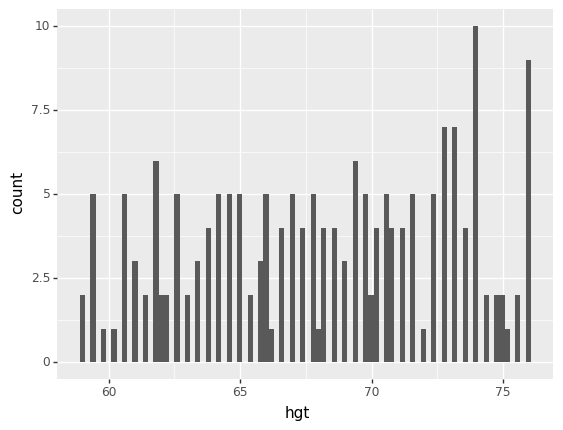

<ggplot: (8778598789235)>

In [19]:
ggplot(df, aes(x="hgt")) \
+ geom_histogram(bins=86)

In [20]:
df.to_csv("data/valid_travelers.csv")

In [21]:
from libs.graphics import *

ec = {"amb":"#ffbf00",
      "blu":"#85abce",
      "brn":"#654321",
      "gry":"#c2c5cc",
      "grn":"#6ca580",
      "hzl":"#b5ae6e",
      "oth":"#800080"}

def main():
    win = GraphWin("My First Drawing", 1200, 1200)

    for i, row in df.iterrows():
        r = Rectangle(Point(30 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), Point(50 + (i % 33) * 35, 100 + 110 * (i // 33)))
        r.setFill("#000000")

        r.draw(win)
        #s = Line(Point(10, 50), Point(70, 60))

        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] - 5 + 110 * (i // 33)), 10)
        c.draw(win)
        c.setFill(row["hcl"])
        c.setOutline(row["hcl"])
        c = Circle(Point(40 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 9)
        c.draw(win)
        c.setOutline("#a1665e")
        c.setFill("#a1665e")
        c = Circle(Point(35 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        c = Circle(Point(45 + (i % 33) * 35, 100 - row["hgt"] + 110 * (i // 33)), 3)
        c.draw(win)
        c.setOutline("#FFFFFF")
        c.setFill(ec[row["ecl"]])
        #s.draw(win)

    win.getMouse()
    win.close()

main()

KeyboardInterrupt: 

# Day 5
## Part 1

In [34]:
def bsearch(s, space, small):
    l, h = 0, space * 2
    for d in s:
        if d == small:
            h -= space
        else:
            l += space
        space //= 2
    return l  

In [35]:
def seat(bsp):
    row = bsearch(bsp[:7], 64, "F")
    column = bsearch(bsp[7:], 4, "L")
    sid = row * 8 + column
    #print(row, column, sid)
    return sid

In [36]:
seat("FBFBBFFRLR") # 357  44 * 8 + 5

357

In [37]:
seat("BFFFBBFRRR")# : row 70, column 7, seat ID 567.

567

In [38]:
seat("FFFBBBFRRR")# : row 14, column 7, seat ID 119.

119

In [39]:
seat("BBFFBBFRLL")# : row 102, column 4, seat ID 820.")

820

In [40]:
def sanity():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    max_id = 0
    for line in data:
        sid = seat(line.strip())
        if sid > max_id:
            max_id = sid
    return max_id

In [41]:
sanity()

835

## Part 2

In [42]:
def missing():
    fin = open("data/input5.txt")
    data = fin.readlines()
    fin.close()
    open_seats = set(range(836))
    for line in data:
        sid = seat(line.strip())
        open_seats.remove(sid)
    return open_seats

In [43]:
missing()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 649}

# Day 6
## Part 1

In [55]:
def common():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    common = set()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line.strip()
        else:
            total += len(set(current))
            current = ""
    total += len(set(current))
    return total

In [56]:
set("abc")

{'a', 'b', 'c'}

In [57]:
common()

6763

## Part 2

In [88]:
def common2():
    fin = open("data/input6.txt")
    data = fin.readlines()
    fin.close()
    total = 0
    current = ""
    for line in data:
        if line.strip() != "":
            current += line
        else:
            people = current.split("\n")
            #print(people)
            common = set(people[0])
            #print(common)
            for p in people[1:-1]:
                common = common.intersection(set(p))
                #print(common)
            total += len(common)
            #print(total)
            current = ""
    people = current.split("\n")
    common = set(people[0])
    #print(common)
    for p in people[1:-1]:
        common = common.intersection(set(p))
        #print(common)
    total += len(common)
    return total

In [89]:
x = common2()

In [90]:
x

3512

# Day 7
## Part 1

In [131]:
def containers(filename):
    c = {}
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    for line in data:
        # https://howtodoinjava.com/python/functions/split-string/
        #print(line.strip())
        big, little = re.split(r' bags contain ', line.strip()) #  line.strip().split(" contain ")
        for piece in little.split(","):
            n = piece.split()
            if n[0] != "no":
                color = n[1] + " " + n[2]
                if color not in c:
                    c[color] = {}
                c[color][big] = int(n[0])
                #print(color + "->" + big + ":" + str(int(n[0])))
    return c

In [132]:
containers("data/input7sample.txt")

{'bright white': {'light red': 1, 'dark orange': 3},
 'muted yellow': {'light red': 2, 'dark orange': 4},
 'shiny gold': {'bright white': 1, 'muted yellow': 2},
 'faded blue': {'muted yellow': 9, 'dark olive': 3, 'vibrant plum': 5},
 'dark olive': {'shiny gold': 1},
 'vibrant plum': {'shiny gold': 2},
 'dotted black': {'dark olive': 4, 'vibrant plum': 6}}

In [133]:
def num_contain(color, dag):
    bigger = set()
    current = [color]
    while len(current) > 0:
        c = current.pop()
        bigger.add(c)
        if c in dag:
            for oc in dag[c]:
                current.append(oc)
    #print(bigger)
    return len(bigger) - 1

In [139]:
num_contain("shiny gold", containers("data/input7sample.txt"))

4

In [135]:
num_contain("shiny gold", containers("data/input7.txt"))

268

## Part 2

In [140]:
def containees(filename):
    c = {}
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    for line in data:
        # https://howtodoinjava.com/python/functions/split-string/
        #print(line.strip())
        big, little = re.split(r' bags contain ', line.strip()) #  line.strip().split(" contain ")
        if big not in c:
            c[big] = {}
        for piece in little.split(","):
            n = piece.split()
            if n[0] != "no":
                color = n[1] + " " + n[2]
                c[big][color] = int(n[0])
                #print(color + "->" + big + ":" + str(int(n[0])))
    return c

In [141]:
containees("data/input7sample.txt")

{'light red': {'bright white': 1, 'muted yellow': 2},
 'dark orange': {'bright white': 3, 'muted yellow': 4},
 'bright white': {'shiny gold': 1},
 'muted yellow': {'shiny gold': 2, 'faded blue': 9},
 'shiny gold': {'dark olive': 1, 'vibrant plum': 2},
 'dark olive': {'faded blue': 3, 'dotted black': 4},
 'vibrant plum': {'faded blue': 5, 'dotted black': 6},
 'faded blue': {},
 'dotted black': {}}

In [148]:
def num_contained(color, dag):
    total = 1
    for c in dag[color]:
        total += dag[color][c] * num_contained(c, dag)
    return total

In [150]:
num_contained("shiny gold", containees("data/input7sample.txt")) - 1

32

In [151]:
num_contained("shiny gold", containees("data/input7sample2.txt")) - 1

126

In [152]:
num_contained("shiny gold", containees("data/input7.txt")) - 1

7867

# Day 8
## Part 1

In [153]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [x.split() for x in data]

In [154]:
get_data("data/input8sample.txt")

[['nop', '+0'],
 ['acc', '+1'],
 ['jmp', '+4'],
 ['acc', '+3'],
 ['jmp', '-3'],
 ['acc', '-99'],
 ['acc', '+1'],
 ['jmp', '-4'],
 ['acc', '+6']]

In [157]:
def loopval(data):
    address = 0
    val = 0
    seen = set()
    while address not in seen:
        seen.add(address)
        inst, change = data[address]
        change = int(change)
        if inst == "nop":
            address += 1
        elif inst == "acc":
            address += 1
            val += change
        elif inst == "jmp":
            address += change
    return val

In [158]:
loopval(get_data("data/input8sample.txt"))

5

In [159]:
loopval(get_data("data/input8.txt"))

1475

## Part 2

In [166]:
def loopval(data):
    address = 0
    val = 0
    seen = set()
    while address not in seen and address < len(data):
        seen.add(address)
        inst, change = data[address]
        change = int(change)
        if inst == "nop":
            address += 1
        elif inst == "acc":
            address += 1
            val += change
        elif inst == "jmp":
            address += change
    return val, address == len(data)

In [167]:
loopval(get_data("data/input8sample.txt"))

(5, False)

In [182]:
data = get_data("data/input8sample.txt")

In [183]:
c = copy.deepcopy(data)
data[-2][0] = "nop"

In [184]:
loopval(data)

(8, True)

In [185]:
c

[['nop', '+0'],
 ['acc', '+1'],
 ['jmp', '+4'],
 ['acc', '+3'],
 ['jmp', '-3'],
 ['acc', '-99'],
 ['acc', '+1'],
 ['jmp', '-4'],
 ['acc', '+6']]

In [191]:
def fixloop(data):
    for i in range(len(data)):
        c = copy.deepcopy(data)
        if c[i][0] == "nop":
            c[i][0] = "jmp"
        elif c[i][0] == "jmp":
            c[i][0] = "nop"
        acc, status = loopval(c)
        if status:
            return acc

In [190]:
fixloop(get_data("data/input8sample.txt"))

0 False
5 False
4 False
5 False
-94 False
5 False
5 False
8 True


8

In [192]:
fixloop(get_data("data/input8.txt"))

1270

# Day 9
## Part 1

In [212]:
def pair_sum(data, target):
    #print(data)
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if data[i] + data[j] == target:
                #print(data[i], data[j])
                return True
    return False

In [226]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [int(x) for x in data]

In [227]:
def first_nosum(filename, window):
    data = get_data(filename)
    for i in range(window, len(data)):
        if not pair_sum(data[i - window:i], data[i]):
            return data[i]

In [228]:
first_nosum("data/input9sample.txt", 5)

127

In [229]:
first_nosum("data/input9.txt", 25)

1930745883

## Part 2

In [241]:
def weakness(filename, window):
    data = get_data(filename)
    missing = first_nosum(filename, window)
    start = 0
    end = 1
    total = data[start] + data[end]
    #print(total, missing)
    while total != missing:
        #print(start, end, total, missing)

        if total < missing:
            end += 1
            total += data[end]
        elif total > missing:
            total -= data[start]
            start += 1
    return min(data[start:end + 1]) + max(data[start:end + 1])

In [242]:
weakness("data/input9sample.txt", 5)

62

In [243]:
weakness("data/input9.txt", 25)

268878261

# Day 10
## Part 1

In [244]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [int(x) for x in data]

In [249]:
def diffs(data):
    one = 0
    three = 1
    data.append(0)
    data.sort()
    for i in range(len(data) - 1):
        if data[i + 1] - data[i] == 1:
            one += 1
        elif data[i + 1] - data[i] == 3:
            three += 1
    return one * three

In [250]:
diffs(get_data("data/input10sample.txt"))

35

In [251]:
diffs(get_data("data/input10sample2.txt"))

220

In [252]:
diffs(get_data("data/input10.txt"))

2664

## Part 2

Time for dynamic programming!

In [262]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    d = [0] + [int(x) for x in data]
    d.sort()
    d.append(d[-1] + 3)
    return d

In [263]:
def diffs(data):
    one = 0
    three = 0
    for i in range(len(data) - 1):
        if data[i + 1] - data[i] == 1:
            one += 1
        elif data[i + 1] - data[i] == 3:
            three += 1
    return one * three

In [266]:
diffs(get_data("data/input10.txt"))

2664

In [314]:
def combos(data):
    counts = np.zeros(len(data), dtype=int)
    counts[0] = 1
    for i in range(1, len(data)):
        for j in range(1, 4):
            if i - j >= 0 and 1 <= data[i] - data[i - j] <= 3:
                counts[i] += counts[i - j]
    print(data)
    print(counts)
    return counts[-1]

In [315]:
combos(get_data("data/input10sample.txt"))

[0, 1, 4, 5, 6, 7, 10, 11, 12, 15, 16, 19, 22]
[1 1 1 1 2 4 4 4 8 8 8 8 8]


8

In [316]:
combos(get_data("data/input10sample2.txt"))

[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20, 23, 24, 25, 28, 31, 32, 33, 34, 35, 38, 39, 42, 45, 46, 47, 48, 49, 52]
[    1     1     2     4     7     7     7    14    28    49    49    49
    49    98   196   196   196   392   392   392   392   784  1568  2744
  2744  2744  2744  2744  2744  5488 10976 19208 19208]


19208

In [317]:
combos(get_data("data/input10.txt"))

[0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 16, 17, 18, 21, 22, 25, 28, 29, 30, 33, 34, 35, 36, 37, 40, 43, 44, 45, 46, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 63, 66, 67, 68, 69, 72, 75, 78, 79, 80, 81, 82, 85, 88, 91, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 115, 118, 119, 122, 123, 124, 125, 126, 129, 132, 133, 134, 135, 138, 139, 140, 141, 144, 147, 148, 149, 150, 153, 156, 157, 158, 159, 160, 163, 166, 167, 168, 169, 172, 173, 174, 177, 178, 179, 180, 183]
[              1               1               2               4
               4               4               8              16
              28              28              28              28
              56              56              56              56
              56              56             112             112
             112             224             448             784
             784             784             784            1568
            3136            3136            3136            6

148098383347712

# Day 11
## Parts 1 and 2

Coded with [Mesa](https://mesa.readthedocs.io/en/stable/)

In [318]:
from mesa import Agent


class Cell(Agent):
    """Represents a single ALIVE or DEAD cell in the simulation."""

    DEAD = 0
    ALIVE = 1
    FLOOR = 2

    def __init__(self, pos, model, init_state=DEAD, part="Part 1"):
        """
        Create a cell, in the given state, at the given x, y position.
        """
        super().__init__(pos, model)
        self.x, self.y = pos
        self.state = init_state
        self._nextState = None
        self.part = part

    @property
    def isAlive(self):
        return self.state == self.ALIVE
    
    @property
    def isDead(self):
        return self.state == self.DEAD

    @property
    def neighbors(self):
        return self.model.grid.neighbor_iter((self.x, self.y), True)

    def step(self):
        if self.part == "Part 1":
            self.step1()
        else:
            self.step2()
    
    def step1(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)

        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors >= 4:
                self._nextState = self.DEAD
        elif self.isDead:
            if live_neighbors == 0:
                self._nextState = self.ALIVE

    def step2(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        #live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)
        live_neighbors = 0
        for dx, dy in [(-1, -1), (-1, 0), (-1, 1), 
                        (0, -1),           (0, 1), 
                        (1, -1),  (1, 0),  (1, 1)]:
            finished = False
            i = 0
            while not finished:
                i += 1
                looking = (self.x + dx * i, self.y + dy * i)
                if self.model.grid.out_of_bounds(looking):
                    finished = True
                elif self.model.grid[looking[0]][looking[1]].isAlive:
                    live_neighbors += 1
                    finished = True
                elif self.model.grid[looking[0]][looking[1]].isDead:
                    finished = True

            
        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors >= 5:
                self._nextState = self.DEAD
        elif self.isDead:
            if live_neighbors == 0:
                self._nextState = self.ALIVE

    def advance(self):
        """
        Set the state to the new computed state -- computed in step().
        """
        self.state = self._nextState


In [340]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector
from mesa.space import Grid

class ConwaysGameOfLife(Model):
    """
    Represents the 2-dimensional array of cells in Conway's
    Game of Life.
    """

    def __init__(self, data, height=10, width=10, part="Part 1"):
        """
        Create a new playing area of (height, width) cells.
        """

        # Set up the grid and schedule.

        # Use SimultaneousActivation which simulates all the cells
        # computing their next state simultaneously.  This needs to
        # be done because each cell's next state depends on the current
        # state of all its neighbors -- before they've changed.
        self.schedule = SimultaneousActivation(self)

        # Use a simple grid, where edges wrap around.
        self.grid = Grid(height, width, torus=False)

        self.dc = DataCollector(
            {
                "Empty": lambda m: self.count_type(m, Cell.DEAD),
                "Occupied": lambda m: self.count_type(m, Cell.ALIVE),
            }
        )

        self.numalive = 0
        
        # Place a cell at each location, with some initialized to
        # ALIVE and some to DEAD.
        for (contents, x, y) in self.grid.coord_iter():
            if data[(len(data) - 1) - y][x] == ".":
                state = Cell.FLOOR
            else:
                state = Cell.DEAD
            cell = Cell((x, y), self, state, part)
           
            self.grid.place_agent(cell, (x, y))
            self.schedule.add(cell)

        self.running = True
        self.dc.collect(self)


    def step(self):
        """
        Have the scheduler advance each cell by one step
        """
        print(self.numalive)
        prev = self.numalive
        self.schedule.step()
        self.schedule.step()
        self.dc.collect(self)

        self.numalive = self.count_type(self, Cell.ALIVE)
        if self.schedule.time > 84:
            self.running = False
        
    @staticmethod
    def count_type(model, condition):
        """
        Helper method to count trees in a given condition in a given model.
        """
        count = 0
        for spot in model.schedule.agents:
            if spot.state == condition:
                count += 1
        return count

In [341]:
fin = open("seating_day_11/seating/data/input11.txt")
data = fin.readlines()
fin.close()

In [342]:
seating1 = ConwaysGameOfLife(data, len(data[0].strip()), len(data), "Part 1")

In [343]:
seating1.run_model()

0
166
365
524
661
799
934
1087
1230
1371
1480
1592
1694
1785
1846
1898
1943
1983
2025
2057
2079
2103
2123
2141
2158
2172
2188
2198
2209
2218
2227
2233
2241
2245
2250
2254
2254
2254
2254
2254
2254
2254
2254


In [353]:
df1 = seating1.dc.get_model_vars_dataframe()
df1["Steps"] = range(0, len(df1) * 2, 2)

In [354]:
df1

,Empty,Occupied,Steps
0,7052,0,0
1,6886,166,2
2,6687,365,4
3,6528,524,6
4,6391,661,8
5,6253,799,10
6,6118,934,12
7,5965,1087,14
8,5822,1230,16
9,5681,1371,18


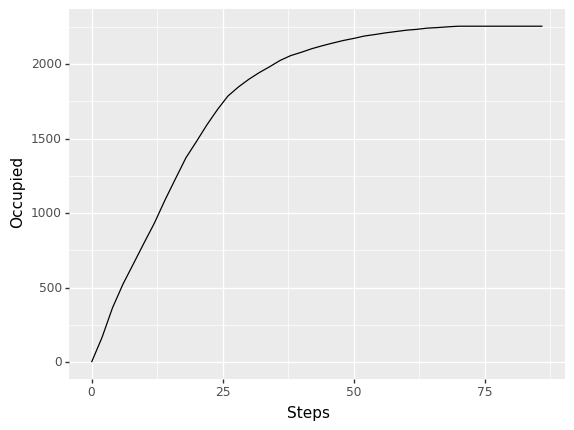

<ggplot: (8772859680196)>

In [355]:
ggplot(df1, aes(x="Steps", y="Occupied")) \
+ geom_line()

In [356]:
seating2 = ConwaysGameOfLife(data, len(data[0].strip()), len(data), "Part 2")

In [357]:
seating2.run_model()

0
4
12
24
41
61
82
108
141
177
214
259
308
363
426
490
559
644
725
804
890
976
1069
1162
1245
1319
1387
1467
1535
1592
1652
1706
1751
1800
1842
1876
1911
1938
1963
1978
1990
2000
2004


In [358]:
df2 = seating2.dc.get_model_vars_dataframe()

In [371]:
df1["Part Two"] = df2["Occupied"]
df1["Part One"] = df1["Occupied"]

In [372]:
df1

,Empty,Occupied,Steps,Part 1,Part 2,Part Two,Part One
0,7052,0,0,0,0,0,0
1,6886,166,2,166,4,4,166
2,6687,365,4,365,12,12,365
3,6528,524,6,524,24,24,524
4,6391,661,8,661,41,41,661
5,6253,799,10,799,61,61,799
6,6118,934,12,934,82,82,934
7,5965,1087,14,1087,108,108,1087
8,5822,1230,16,1230,141,141,1230
9,5681,1371,18,1371,177,177,1371


/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


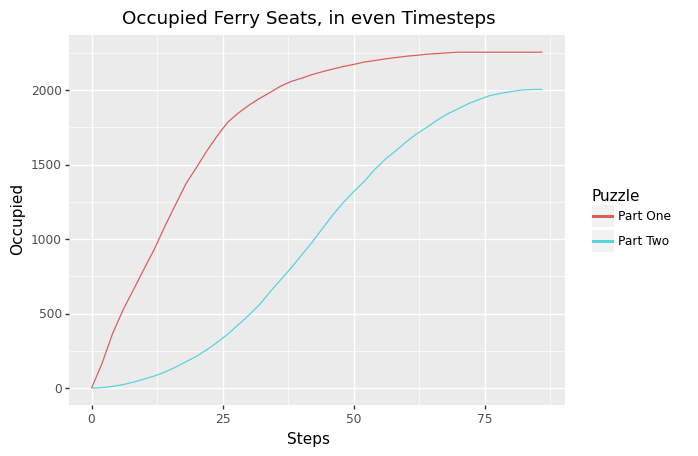

<ggplot: (8772858553929)>

In [374]:
resultsmelt = pd.melt(df1, id_vars=["Steps"], value_vars=["Part One", "Part Two"], var_name='Puzzle', value_name='Occupied')
ggplot(resultsmelt, aes(x="Steps", y="Occupied", color="Puzzle")) \
+ geom_line() \
+ labs(title="Occupied Ferry Seats, in even Timesteps")


# Day 12
## Part 1

In [375]:
def get_data(filename):
    fin = open(filename)
    data = fin.readlines()
    fin.close()
    return [(x[0], int(x[1:].strip())) for x in data]

In [377]:
get_data("data/input12sample.txt")

[('F', 10), ('N', 3), ('F', 7), ('R', 90), ('F', 11)]

In [381]:
def cart(r, theta):
    return r * math.cos(math.radians(theta)), r * math.sin(math.radians(theta))
    

In [397]:
def route(data):
    xs = [0]
    ys = [0]
    loc = [0, 0]
    heading = 0
    for action, value in data:
        if action == "N":
            loc[1] += value
        elif action == "S":
            loc[1] -= value
        elif action == "E":
            loc[0] += value
        elif action == "W":
            loc[0] -= value
        elif action == "F":
            dx, dy = cart(value, heading)
            loc[0] += round(dx)
            loc[1] += round(dy)
        elif action == "R":
            heading -= value
        elif action == "L":
            heading += value
        #print(loc)
        xs.append(loc[0])
        ys.append(loc[1])
    return int(abs(loc[0]) + abs(loc[1])), xs, ys

In [407]:
manhat, xs, ys = route(get_data("data/input12.txt"))

In [408]:
manhat

879

In [409]:
df = pd.DataFrame({"x":xs, "y":ys})

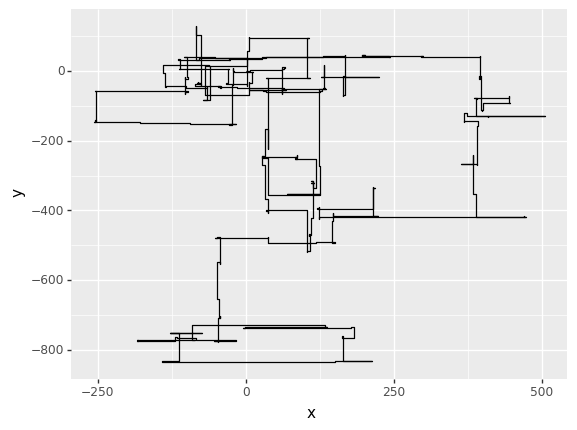

<ggplot: (8772852682632)>

In [410]:
ggplot(df, aes(x="x", y="y")) \
+ geom_path()

## Part 2

In [437]:
def rotate(loc, value):
    x = loc[0] * math.cos(math.radians(value)) - loc[1] * math.sin(math.radians(value))
    y = loc[0] * math.sin(math.radians(value)) + loc[1] * math.cos(math.radians(value))
    #print(x, y)
    return round(x), round(y)

In [505]:
def wproute(data):
    xs = [0]
    ys = [0]
    wxs = [10]
    wys = [1]
    loc = [10, 1]
    ship = [0, 0]
    for action, value in data:
        if action == "N":
            loc[1] += value
        elif action == "S":
            loc[1] -= value
        elif action == "E":
            loc[0] += value
        elif action == "W":
            loc[0] -= value
        elif action == "F":
            ship[0] += value * loc[0]
            ship[1] += value * loc[1]
        elif action == "L":
            #https://en.wikipedia.org/wiki/Rotation_matrix
            
            loc[0], loc[1] = rotate(loc, value)
        elif action == "R":
            value *= -1
            loc[0], loc[1] = rotate(loc, value)

        #print(ship, loc)
        xs.append(ship[0])
        ys.append(ship[1])        
        wxs.append(loc[0])
        wys.append(loc[1])
    return int(abs(ship[0]) + abs(ship[1])), xs, ys, wxs, wys

In [506]:
manhat, xs, ys, wxs, wys = wproute(get_data("data/input12sample.txt"))

In [507]:
manhat

286

In [508]:
manhat, xs, ys, wxs, wys = wproute(get_data("data/input12.txt"))

In [509]:
manhat

18107

<ipython-input-520-49d7363ebddb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


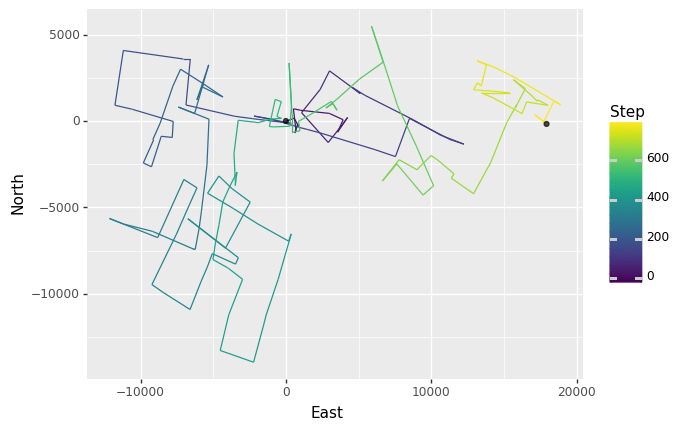

<ggplot: (8772861110417)>

In [520]:
df = pd.DataFrame({"East":xs, "North":ys, "Step":range(len(xs))})
fl = df.loc[(df["Step"] == 0) | (df["Step"] == len(xs) - 1)]
fl["Name"] = ["Cur", "Dest"]
ggplot(df, aes(x="East", y="North")) \
+ geom_path(aes(color="Step")) \
+ geom_point(data=fl, alpha=0.7)

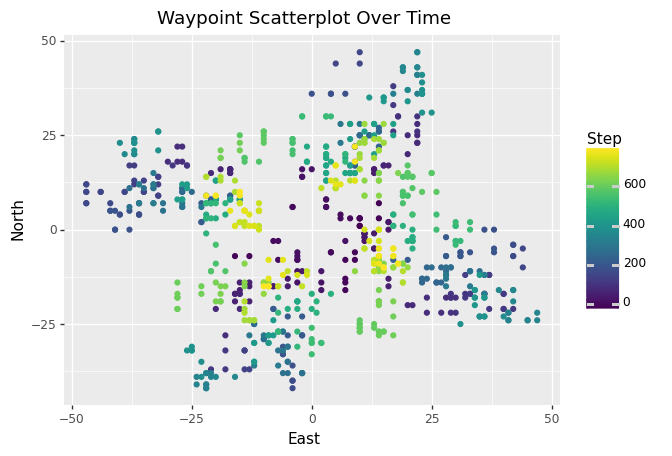

<ggplot: (8772861065497)>

In [518]:
df = pd.DataFrame({"East":wxs, "North":wys, "Step":range(len(wxs))})
ggplot(df, aes(x="East", y="North")) \
+ geom_point(aes(color="Step")) \
+ labs(title="Waypoint Scatterplot Over Time")

# Day 13
## Part 1

In [4]:
def get_data(filename):
    fin = open(filename)
    time = int(fin.readline().strip())
    bus = fin.readline().strip().split(",")
    return time, bus

In [5]:
get_data("data/input13sample.txt")

(939, ['7', '13', 'x', 'x', '59', 'x', '31', '19'])

In [10]:
def leavetime(filename):
    time, bus = get_data(filename)
    smallest = 1000000000000
    chosen = -1
    for b in bus:
        if b.isdigit():
            num = int(b)
            delay = num - time % num
            print(num, delay)
            if delay < smallest:
                smallest = delay
                chosen = num
    return smallest * chosen

In [11]:
leavetime("data/input13sample.txt")

7 6
13 10
59 5
31 22
19 11


295

In [12]:
leavetime("data/input13.txt")

19 14
41 35
823 544
23 7
17 14
29 7
443 5
37 17
13 11


2215

## Part 2

* The earliest timestamp that matches the list 17,x,13,19 is 3417.
* 67,7,59,61 first occurs at timestamp 754018.
* 67,x,7,59,61 first occurs at timestamp 779210.
* 67,7,x,59,61 first occurs at timestamp 1261476.
* 1789,37,47,1889 first occurs at timestamp 1202161486.


* 17 * 201 = 13 * 263 - 2
* 17 * 201 = 19 * 180 - 3


17 * x = 13 * y - 2


17 * (i + x * 13) = 13 * (j + x * 17) - 2

17 * (k + y * 19) = 19 * (m + y * 17) - 3

Why is it 6, 8?  17 * 6 % 13 - 2 == 0 

* 17 * (6 + x * 13) = 13 * (8 + x * 17) - 2
* 17 * (11 + y * 19) = 19 * (10 + y * 17) - 3

Why is it 10, 15?

* 17 * (6 + 15 * 13) = 13 * (8 + 15 * 17) - 2
* 17 * (11 + 10 * 19) = 19 * (10 + 10 * 17) - 3


* (17 * 6) + (17 * 13 * 15) = 13 * (8 + 15 * 17) - 2
* (17 * 11) + (17 * 19 * 10) = 19 * (10 + 10 * 17) - 3

In [13]:
3417 / 17

201.0

In [17]:
3419 / 13

263.0

In [18]:
3420 / 19

180.0

In [21]:
for x in range(175,185):
    print(x * 19)

3325
3344
3363
3382
3401
3420
3439
3458
3477
3496


In [83]:
def diff(a, b, delta):
    ca = a
    cb = b
    d = cb - ca
    i = 1
    j = 1
    while d != delta:
        if ca < cb:
            ca += a
            i += 1
        else:
            cb += b
            j += 1
        #print(ca, cb)
        d = cb - ca
    return i, j

In [84]:
diff(17, 13, 2)

(6, 8)

In [85]:
17 * (6 + 13)

323

In [86]:
13 * (8 + 17)

325

In [87]:
def silly(a, b, delta) :
    pi, pj = 0, 0
    for i in range(300):
        for j in range(300):
            if a * i + delta == b * j:
                print(a * i + delta, i, j, j - i, i - pi, j - pj)
                pi, pj = i, j
                break

In [88]:
silly(17, 13, 2)

104 6 8 2 6 8
325 19 25 6 13 17
546 32 42 10 13 17
767 45 59 14 13 17
988 58 76 18 13 17
1209 71 93 22 13 17
1430 84 110 26 13 17
1651 97 127 30 13 17
1872 110 144 34 13 17
2093 123 161 38 13 17
2314 136 178 42 13 17
2535 149 195 46 13 17
2756 162 212 50 13 17
2977 175 229 54 13 17
3198 188 246 58 13 17
3419 201 263 62 13 17
3640 214 280 66 13 17
3861 227 297 70 13 17


In [93]:
def silly2(a, b, delta):
    i, j = diff(a, b, delta)
    for x in range(20):
        print(a * (i + x * b) + delta, (i + x * b), (j + x * a))

In [92]:
silly2(17, 13, 2)

104 6 8
325 19 25
546 32 42
767 45 59
988 58 76
1209 71 93
1430 84 110
1651 97 127
1872 110 144
2093 123 161
2314 136 178
2535 149 195
2756 162 212
2977 175 229
3198 188 246
3419 201 263
3640 214 280
3861 227 297
4082 240 314
4303 253 331


In [101]:
diff(13, 17, -2)

(8, 6)

In [102]:
diff(19, 17, -3)

(10, 11)

In [97]:
silly2(19, 17, -3)

187 10 11
510 27 30
833 44 49
1156 61 68
1479 78 87
1802 95 106
2125 112 125
2448 129 144
2771 146 163
3094 163 182
3417 180 201
3740 197 220
4063 214 239
4386 231 258
4709 248 277
5032 265 296
5355 282 315
5678 299 334
6001 316 353
6324 333 372


In [98]:
silly2(13, 17, -2)

102 8 6
323 25 19
544 42 32
765 59 45
986 76 58
1207 93 71
1428 110 84
1649 127 97
1870 144 110
2091 161 123
2312 178 136
2533 195 149
2754 212 162
2975 229 175
3196 246 188
3417 263 201
3638 280 214
3859 297 227
4080 314 240
4301 331 253


In [108]:
for x in range(20):
    print(x, 17 * (6 + x * 13), 13 * (8 + x * 17) - 2)
    print(x, 17 * (11 + x * 19), 19 * (10 + x * 17) - 3)

0 102 102
0 187 187
1 323 323
1 510 510
2 544 544
2 833 833
3 765 765
3 1156 1156
4 986 986
4 1479 1479
5 1207 1207
5 1802 1802
6 1428 1428
6 2125 2125
7 1649 1649
7 2448 2448
8 1870 1870
8 2771 2771
9 2091 2091
9 3094 3094
10 2312 2312
10 3417 3417
11 2533 2533
11 3740 3740
12 2754 2754
12 4063 4063
13 2975 2975
13 4386 4386
14 3196 3196
14 4709 4709
15 3417 3417
15 5032 5032
16 3638 3638
16 5355 5355
17 3859 3859
17 5678 5678
18 4080 4080
18 6001 6001
19 4301 4301
19 6324 6324


In [142]:
print(15, 17 * (6 + 15 * 13), 13 * (8 + 15 * 17) - 2)
print(10, 17 * (11 + 10 * 19), 19 * (10 + 10 * 17) - 3)

15 3417 3417
10 3417 3417


In [148]:
for i in range(19):
    print(19 - i, (17 * i) % 19 - 3)

19 -3
18 14
17 12
16 10
15 8
14 6
13 4
12 2
11 0
10 -2
9 15
8 13
7 11
6 9
5 7
4 5
3 3
2 1
1 -1


In [257]:
def diff2(a, b, delta):
    for i in range(a):
        #print(a - i, (b * i) % a - delta % a, delta % a)
        if (b * i) % a - delta == 0:
            return a - i

In [229]:
diff2(17, 13, 15)

8

In [290]:
def attempt(filename):
    time, bus = get_data(filename)
    first = int(bus[0])
    m = {}
    for i in range(1, len(bus)):  
        if bus[i] != "x":
            n = int(bus[i])
            b, v = diff3(first, n, i % n, 0)
            print(n, first, i, b, i // n, first * (b + (i // n) * n))
            m[i] = (b, i // n)

In [291]:
attempt("data/input13sample2.txt")

1 6
2 10
3 1
4 5
5 9
6 0
13 17 2 6 0 102
1 1
2 18
3 16
4 14
5 12
6 10
7 8
8 6
9 4
10 2
11 0
19 17 3 11 0 187


In [124]:
#https://stackoverflow.com/questions/51716916/built-in-module-to-calculate-the-least-common-multiple

In [129]:
np.lcm.reduce([11, 50, 8, 18])

19800

In [228]:
diff2(17, 19, 36)

(17 * 6) + (17 * 13 * 15) = 13 * (8 + 15 * 17) - 2
(17 * 11) + (17 * 19 * 10) = 19 * (10 + 10 * 17) - 3

In [254]:
diff2(17 * 19, 17 * 13, 17 * 11 - 17 * 6)

308

In [335]:
def diff3(a, b, delta, delta2):
    i = 0
    while True:
        i += 1
        delta += a
        #print(i, delta % b)
        if delta % b == delta2:
            return i, delta

In [336]:
diff3(17 * 13, 17 * 19, 17 * 6, 17 * 11)

(15, 3417)

In [337]:
diff3(17 * 19, 17 * 13, 17 * 11, 17 * 6)

(10, 3417)

In [338]:
diff2(13, 17, 2)

6

In [341]:
diff3(17, 13, 2, 0)

(6, 104)

In [359]:
def attempt2(filename):
    time, bus = get_data(filename)
    first = int(bus[0])
    cur = first
    m = {}
    w = -1
    it = -1
    for i in range(1, len(bus)):  
        if bus[i] != "x":
            n = int(bus[i])
            b, v = diff3(first, n, i, 0)
            print(n, first, i, b, i // n, first * (b + (i // n) * n))
            print(b, i // n)
            if cur != first:
                print(cur, first * n, it, first * b)
                print(diff3(cur, first * n, it, first * b))
                w, it = diff3(cur, first * n, it, first * b)
            else:
                it = first * b
            cur *= n
    return it

In [360]:
attempt2("data/input13sample2.txt")

13 17 2 6 0 102
6 0
19 17 3 11 0 187
11 0
221 323 102 187
(15, 3417)


3417

In [361]:
attempt2("data/input13sample3.txt")  # 754018

7 67 1 5 0 335
5 0
59 67 2 44 0 2948
44 0
469 3953 335 2948
(14, 6901)
61 67 3 30 0 2010
30 0
27671 4087 6901 2010
(27, 754018)


754018

In [362]:
attempt2("data/input13sample.txt")  # 1068788

13 7 1 11 0 77
11 0
59 7 4 50 0 350
50 0
91 413 77 350
(3, 350)
31 7 6 8 0 56
8 0
5369 217 350 56
(13, 70147)
19 7 7 18 0 126
18 0
166439 133 70147 126
(6, 1068781)


1068781

In [363]:
attempt2("data/input13.txt")  # ????

41 19 9 6 0 114
6 0
823 19 19 822 0 15618
822 0
779 15637 114 15618
(321, 250173)
23 19 27 1 1 456
1 1
641117 437 250173 19
(18, 11790279)
17 19 36 16 2 950
16 2
14745691 323 11790279 304
(12, 188738571)
29 19 48 28 1 1083
28 1
250676747 551 188738571 532
(1, 439415318)
443 19 50 44 0 836
44 0
7269625663 8417 439415318 836
(294, 2137709360240)
37 19 56 36 1 1387
36 1
3220444168709 703 2137709360240 684
(32, 105191922758928)
13 19 63 9 4 1159
9 4
119156434242233 247 105191922758928 171
(8, 1058443396696792)


1058443396696792

# OMG it works!
That was close

# Day 14
## Part 1

In [404]:
def get_data(filename):
    fin = open(filename)
    data = re.split("mask = ", fin.read())
    fin.close()
    return [x.strip().split("\n") for x in data[1:]]

In [406]:
get_data("data/input14sample.txt")

[['XXXXXXXXXXXXXXXXXXXXXXXXXXXXX1XXXX0X',
  'mem[8] = 11',
  'mem[7] = 101',
  'mem[8] = 0']]

In [431]:
def interface(filename):
    data = get_data(filename)
    memory = {}
    for d in data:
        mask = d[0]
        andmask = int(mask.replace("X", "1"), 2)
        ormask = int(mask.replace("X", "0"), 2)
        #print(andmask, ormask)
        inst = d[1:]
        for i in inst:
            s = re.split("] = ", i)
            addr = int(s[0][4:])
            start = int(s[1])
            start &= andmask
            start |= ormask
            #print(addr, start)
            memory[addr] = start
    #print(memory)
    return sum(list(memory.values()))

In [432]:
interface("data/input14sample.txt")

165

In [433]:
interface("data/input14.txt") # 8570568288597

8570568288597

## Part 2

In [480]:
def make_masks(xmask):
    i = xmask.rfind("X")
    if i == -1:
        return [xmask]
    else:
        ret = []
        for x in make_masks(xmask[:i]):
            ret.append(x + "0" + xmask[i + 1:])
            ret.append(x + "1" + xmask[i + 1:])
        return ret

In [527]:
def update_val(val, mask, char):
    andmask = int(mask.replace(char, "1"), 2)
    ormask = int(mask.replace(char, "0"), 2)
    val &= andmask
    val |= ormask
    return val

In [559]:
def mad_broken(filename):
    data = get_data(filename)
    memory = {}
    updates = []
    for d in data:
        mask = d[0]
        ormask = int(mask.replace("X", "0"), 2)
        xmask = mask.replace("0", "Y")
        xmask = xmask.replace("1", "Y")
        #print(xmask, ormask)
        allmasks = make_masks(xmask)
        #print(allmasks)
        inst = d[1:]
        for i in inst:
            s = re.split("] = ", i)
            addr = int(s[0][4:])
            #print(addr)
            start = int(s[1])
            addr |= ormask
            for x in allmasks:
                taddr = addr
                andmask = int(x.replace("Y", "1"), 2)
                ormask = int(x.replace("Y", "0"), 2)
                taddr &= andmask
                taddr |= ormask
                #print(addr, start)
                updates.append(taddr)
                memory[taddr] = start
    #print(memory)
    return sum(list(memory.values())), updates

In [553]:
def mad(filename):
    data = get_data(filename)
    memory = {}
    updates = []
    for d in data:
        mask = d[0]
        ormask = int(mask.replace("X", "0"), 2)
        xmask = mask.replace("0", "Y")
        xmask = xmask.replace("1", "Y")
        #print(xmask, ormask)
        allmasks = make_masks(xmask)
        #print(allmasks)
        inst = d[1:]
        for i in inst:
            s = re.split("] = ", i)
            addr = int(s[0][4:])
            #print(addr)
            start = int(s[1])
            addr |= ormask
            for x in allmasks:
                taddr = update_val(addr, x, "Y")
                updates.append(taddr)
                memory[taddr] = start
    #print(memory)
    return sum(list(memory.values())), updates

In [554]:
mad("data/input14sample2.txt")

(208, [26, 27, 58, 59, 16, 17, 18, 19, 24, 25, 26, 27])

In [555]:
mad_broken("data/input14sample2.txt")

(208, [26, 27, 58, 59, 16, 17, 18, 19, 24, 25, 26, 27])

In [534]:
re.findall("X", "YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYXYYYYX")

['X', 'X']

In [535]:
#https://stackoverflow.com/questions/3519565/find-the-indexes-of-all-regex-matches

In [536]:
[m.start(0) for m in re.finditer("X", "YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYXYYYYX")]

[30, 35]

In [537]:
make_masks("YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYXYYYYX")

['YYYYYYYYYYYYYYYYYYYYYYYYYYYYYY0YYYY0',
 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYY0YYYY1',
 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYY1YYYY0',
 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYY1YYYY1']

In [549]:
x, up = mad("data/input14.txt")

In [ ]:
# 3409958329898 is too high
# 3382160243493 is too high
# 3289441921203 is correct!

In [550]:
x

3289441921203

In [560]:
y, up2 = mad_broken("data/input14.txt")

In [557]:
up[:20]

[30157314764,
 30157314765,
 30157314796,
 30157314797,
 30425750220,
 30425750221,
 30425750252,
 30425750253,
 64517053132,
 64517053133,
 64517053164,
 64517053165,
 64785488588,
 64785488589,
 64785488620,
 64785488621,
 30157347008,
 30157347009,
 30157347040,
 30157347041]

In [561]:
up2[:20]

[30157314764,
 30157314765,
 30157314796,
 30157314797,
 30425750220,
 30425750221,
 30425750252,
 30425750253,
 64517053132,
 64517053133,
 64517053164,
 64517053165,
 64785488588,
 64785488589,
 64785488620,
 64785488621,
 30157347008,
 30157347009,
 30157347040,
 30157347041]

Rewrote broken with function it worked! Scoping leaks in python, grrr.

### Just for fun

In [715]:
def starchart(year):
    df = pd.read_csv(f"data/stardrops/stardrop{year}.csv", 
                     header=None, names=["Puzzle", "Part 1", "Part 2", "Viz"])
    df["Total"] = df["Part 1"] + df["Part 2"]
    t = list(df["Total"].values)
    t.pop()
    df["Tshift"] = [0] + t
    df["Retention"] = df["Tshift"] / df["Part 1"]
    df = df.drop([0])
    c = ggplot(df, aes(x="Puzzle", y="Retention")) \
    + geom_line() \
    + geom_smooth() \
    + geom_hline(yintercept = 1, color='red',    # set line colour
                      size=2,            # set line thickness
                      linetype="dashed" ) \
    + geom_point() \
    + labs(title=f"AoC{year}: Ratio of Next Day Total to Current Gold") \
    + scale_x_continuous(breaks=range(1, 25), minor_breaks=[], limits=[1, 24]) \
    + scale_y_continuous(limits=[0.5, 1.75])
    return c

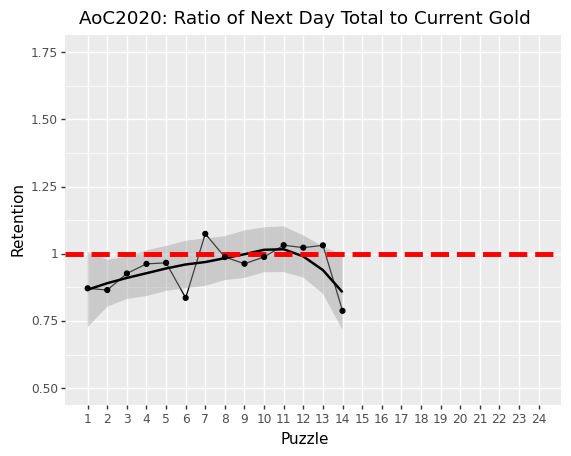

<ggplot: (8791694386125)>

In [837]:
starchart(2020)

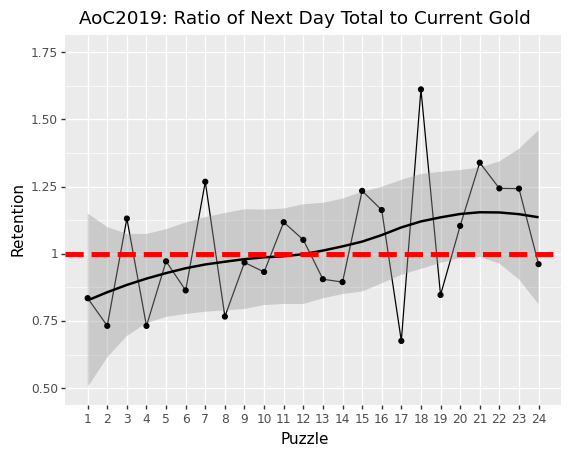

<ggplot: (8791694291987)>

In [717]:
starchart(2019)

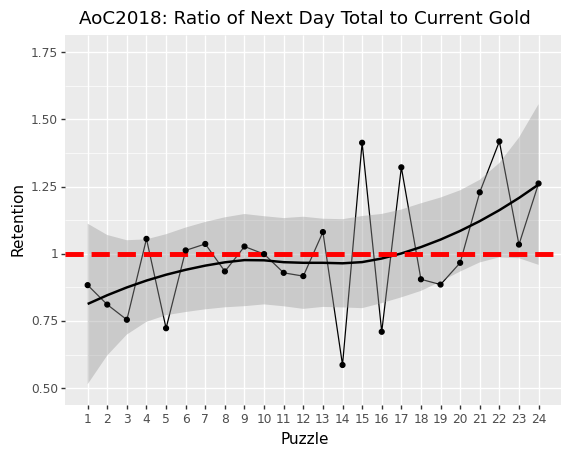

<ggplot: (8791692728733)>

In [718]:
starchart(2018)

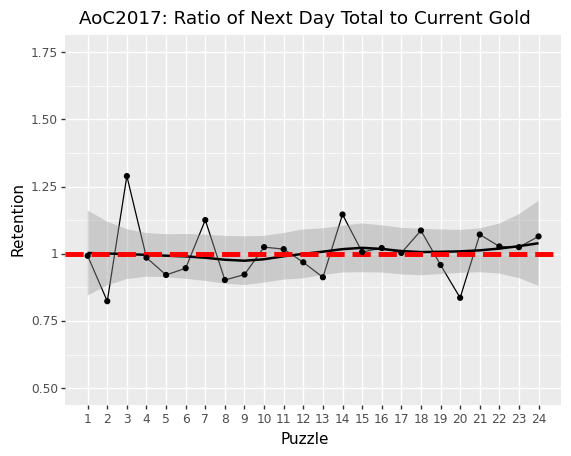

<ggplot: (8791693235920)>

In [719]:
starchart(2017)

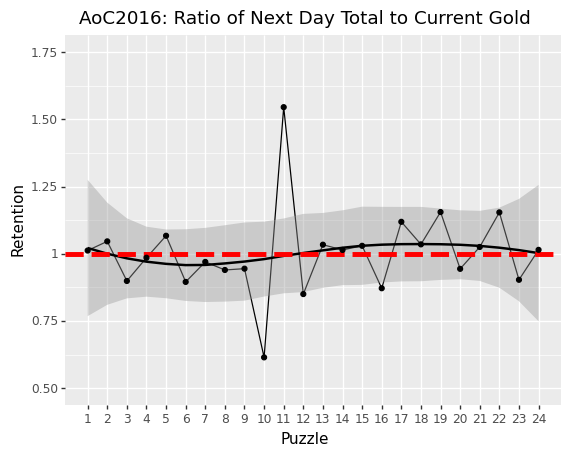

<ggplot: (8791693926831)>

In [720]:
starchart(2016)

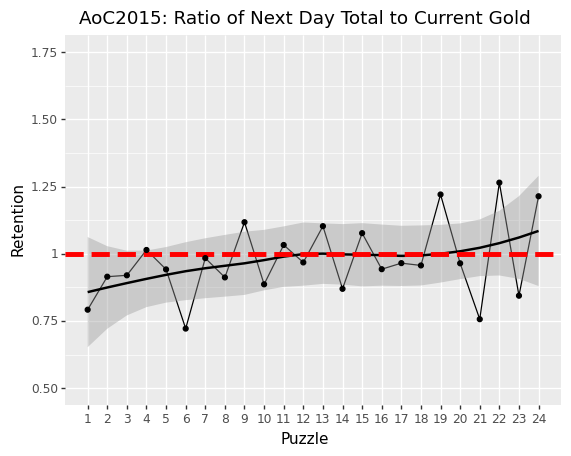

<ggplot: (8791693235788)>

In [721]:
starchart(2015)

In [747]:
def make_big_stardf():
    bdf = []
    for year in range(2015, 2021):
        df = pd.read_csv(f"data/stardrops/stardrop{year}.csv", 
                 header=None, names=["Puzzle", "Part 1", "Part 2", "Viz"])
        df["Total"] = df["Part 1"] + df["Part 2"]
        t = list(df["Total"].values)
        t.pop()
        df["Tshift"] = [0] + t
        df["Retention"] = df["Tshift"] / df["Part 1"]
        df = df.drop([0])
        df["Year"] = [year] * len(df)
        if year == 2015:
            bdf = df
        else:
            bdf = bdf.append(df)
    return bdf

In [748]:
make_big_stardf()

,Puzzle,Part 1,Part 2,Viz,Total,Tshift,Retention,Year
1,24,3887,61,****,3948,4719,1.214047,2015
2,23,4677,33,*****,4710,3948,0.844131,2015
3,22,3724,118,****,3842,4710,1.264769,2015
4,21,5077,138,*****,5215,3842,0.756746,2015
5,20,5406,390,*****,5796,5215,0.964669,2015
...,...,...,...,...,...,...,...,...
9,5,74249,1465,**********************,75714,71712,0.965831,2020
10,4,78749,9530,*************************,88279,75714,0.961460,2020
11,3,95317,3018,****************************,98335,88279,0.926162,2020
12,2,113668,3385,*********************************,117053,98335,0.865107,2020


In [771]:
def bigstarchart(bdf):
    c = ggplot(bdf, aes(x="Puzzle", y="Retention")) \
    + geom_line() \
    + geom_smooth() \
    + geom_hline(yintercept = 1, color='red',    # set line colour
                      size=2,            # set line thickness
                      linetype="dashed" ) \
    + geom_point() \
    + facet_wrap("~ Year") \
    + theme(figure_size=(14, 6), axis_text_x=element_text(rotation=90)) \
    + labs(title=f"Ratio of Next Day Total to Current Day Gold") \
    + scale_x_continuous(breaks=range(1, 25), minor_breaks=[], limits=[1, 24]) \
    + scale_y_continuous(breaks=[0.5, 1, 1.5], limits=[0.5, 1.66])
    return c

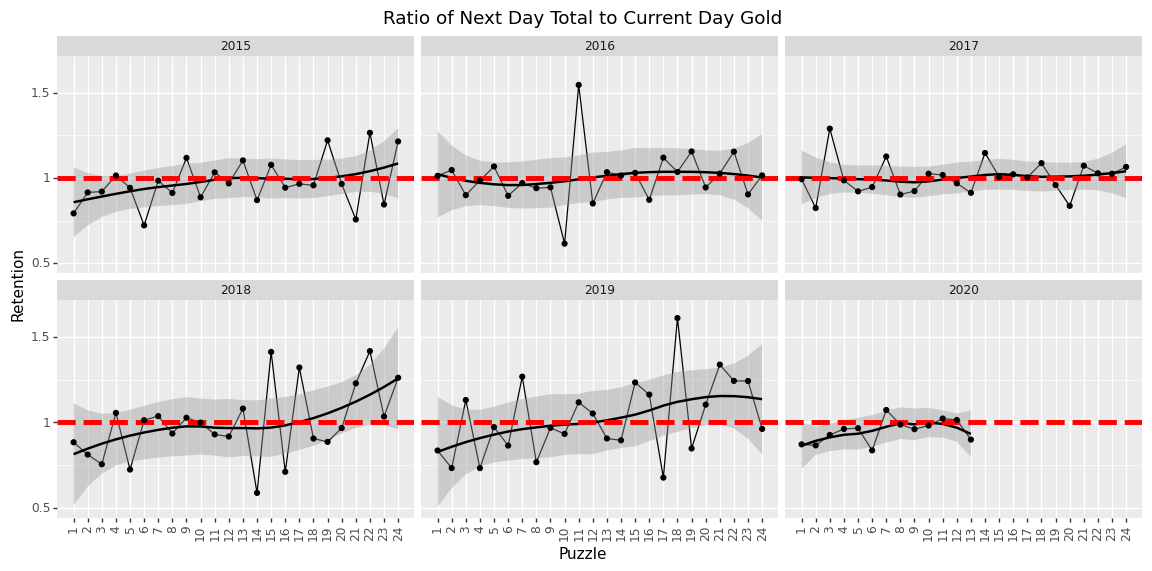

<ggplot: (8791695573381)>

In [772]:
bigstarchart(make_big_stardf())

# Day 15
## Part 1

In [773]:
data = [5,2,8,16,18,0,1]

In [774]:
sample1 = [0, 3, 6]

In [790]:
def elf_game(burners, end):
    when = {}
    turn = 0
    last_spoken = -1
    while turn < end:
        if turn < len(burners):
            when[burners[turn]] = turn + 1
            last_spoken = burners[turn]
            new = True
        elif turn == len(burners):
            last_spoken = 0
        else:
            if last_spoken not in when:
                when[last_spoken] = turn
                last_spoken = 0
            else:
                #print(turn, when[last_spoken])
                say_next = turn - when[last_spoken]
                when[last_spoken] = turn
                last_spoken = say_next
        turn += 1
        #print(last_spoken)
    return last_spoken

In [791]:
elf_game(sample1, 2020)

436

In [792]:
elf_game([3, 1, 2], 2020)

1836

In [793]:
elf_game(data, 2020)

517

## Part 2

In [794]:
elf_game(data, 30000000)

1047739

That's it? Can I make it faster?

In [886]:
def elf_game_fast(burners, end):
    when = {}
    turn = 0
    for b in burners:
        when[b] = turn + 1
        turn += 1
        #print(turn, b)
    turn += 1
    last_spoken = 0
    #print(turn, last_spoken)
    while turn < end:
        if last_spoken not in when:
            when[last_spoken] = turn
            last_spoken = 0
        else:
            say_next = turn - when[last_spoken]
            when[last_spoken] = turn
            last_spoken = say_next
        turn += 1
        #print(turn, last_spoken)
    return last_spoken

In [890]:
%%time 
elf_game(data, 30000000)

CPU times: user 15.1 s, sys: 327 ms, total: 15.4 s
Wall time: 15.5 s


1047739

In [891]:
%%time
elf_game_fast(data, 30000000)

CPU times: user 11.7 s, sys: 298 ms, total: 12 s
Wall time: 12.1 s


1047739

# Day 16
## Part 1

In [970]:
def get_data(filename):
    fin = open(filename)
    fields, mine, others = re.split("\n\n", fin.read())
    fin.close()
    fs = {}
    for f in fields.split("\n"):
        c = f.index(":")
        fs[f[:c]] = [int(x) for x in f[c+2:].replace(" or ", "-").split("-")]
    m = [int(x) for x in mine[13:].split(",")]
    o = [[int(x) for x in yours.split(",")] for yours in others[16:].split("\n")]
    return fs, m, o
    #print(others[16:].split("\n"))

In [971]:
get_data("data/input16sample.txt")

({'class': [1, 3, 5, 7], 'row': [6, 11, 33, 44], 'seat': [13, 40, 45, 50]},
 [7, 1, 14],
 [[7, 3, 47], [40, 4, 50], [55, 2, 20], [38, 6, 12]])

In [972]:
def bad_ticket(field, t):
    return t < field[0] or t > field[3] or (t > field[1] and t < field[2])

In [973]:
def validate(filename):
    invalid = []
    fields, mine, others = get_data(filename)
    for ticket in others:
        for t in ticket:
            #print(t)
            valid = False
            for f in fields:
                if not bad_ticket(fields[f], t):
                    #print(f)
                    valid = True
                    break
            if not valid:
                invalid.append(t)
    #print(invalid)
    return sum(invalid)

In [974]:
validate("data/input16sample.txt")

71

In [975]:
get_data("data/input16.txt")

({'departure location': [36, 269, 275, 973],
  'departure station': [25, 237, 245, 972],
  'departure platform': [34, 576, 586, 967],
  'departure track': [48, 199, 206, 959],
  'departure date': [31, 172, 194, 962],
  'departure time': [34, 448, 454, 955],
  'arrival location': [42, 400, 419, 965],
  'arrival station': [36, 528, 551, 956],
  'arrival platform': [46, 456, 466, 960],
  'arrival track': [48, 293, 303, 966],
  'class': [50, 796, 818, 950],
  'duration': [46, 589, 610, 957],
  'price': [38, 55, 66, 957],
  'route': [37, 144, 154, 961],
  'row': [48, 832, 853, 949],
  'seat': [40, 495, 516, 952],
  'train': [32, 429, 441, 971],
  'type': [27, 338, 355, 955],
  'wagon': [42, 473, 488, 973],
  'zone': [26, 379, 386, 972]},
 [127,
  109,
  139,
  113,
  67,
  137,
  71,
  97,
  53,
  103,
  163,
  167,
  131,
  83,
  157,
  101,
  107,
  79,
  73,
  89],
 [[288,
   283,
   266,
   637,
   119,
   712,
   555,
   718,
   872,
   424,
   828,
   751,
   364,
   159,
   611,
   2

In [976]:
validate("data/input16.txt")

22073

## Part 2

In [980]:
def only_valid(fields, others):
    validt = []
    for ticket in others:
        all_valid = True
        for t in ticket:
            #print(t)
            valid = False
            for f in fields:
                if not bad_ticket(fields[f], t):
                    #print(f)
                    valid = True
                    break
            if not valid:
                all_valid = False
        if all_valid:
            validt.append(ticket)
    return validt

In [982]:
fields, m, others = get_data("data/input16sample2.txt")
only_valid(fields, others)

[[3, 9, 18], [15, 1, 5], [5, 14, 9]]

In [1017]:
def validate(filename):
    fields, mine, others = get_data(filename)
    possible = []
    for i in range(len(mine)):
        possible.append(set(fields.keys()))
    others = only_valid(fields, others)
    for ticket in others:
        for i in range(len(ticket)):
            for f in fields:
                if bad_ticket(fields[f], ticket[i]):
                    possible[i].remove(f)
                    
    actual = []
    for i in range(len(mine)):
        actual.append("")
    for i in range(len(mine)):
        what = ""
        for j in range(len(mine)):
            if len(possible[j]) == 1:
                for p in possible[j]:
                    what = p
                    actual[j] += p
                break
        for j in range(len(mine)):
            if what in possible[j]:
                possible[j].remove(what)
    mult = 1
    for i in range(len(mine)):
        if actual[i].startswith("departure"):
            print(mine[i])
            mult *= mine[i]
    return mult

In [1018]:
validate("data/input16sample2.txt")

1

In [1019]:
validate("data/input16.txt")

113
71
97
103
157
107


1346570764607

# Day 17

skipped for now, I want to add 3D and 4D grids to mesa

## Part 1

In [1122]:
import itertools

import numpy as np

from typing import Any, Dict, Iterable, Iterator, List, Optional, Set, Tuple, Union
from mesa.agent import Agent

Coordinate = Tuple[int, int]
GridContent = Union[Optional[Agent], Set[Agent]]
# used in ContinuousSpace
FloatCoordinate = Union[Tuple[float, float], np.ndarray]
Coordinate3D = Tuple[int, int, int]

def accept_3Dtuple_argument(wrapped_function):
    """ Decorator to allow grid methods that take a list of (x, y, z) coord tuples
    to also handle a single position, by automatically wrapping tuple in
    single-item list rather than forcing user to do it.

    """

    def wrapper(*args: Any):
        if isinstance(args[1], tuple) and len(args[1]) == 3:
            return wrapped_function(args[0], [args[1]])
        else:
            return wrapped_function(*args)

    return wrapper

class Grid3D:
    """ Base class for a cube grid.

    Grid cells are indexed by [x][y][z], where [0][0][0] is assumed to be the
    bottom-left and [width-1][height-1][depth-1] is the top-right. If a grid is
    toroidal, the top and bottom, and left and right, and front and back,
    edges wrap to each other

    Properties:
        width, height, depth: The grid's width and height and depth.
        torus: Boolean which determines whether to treat the grid as a torus.
        grid: Internal list-of-lists-of-lists which holds the grid cells themselves.

    Methods:
        get_neighbors: Returns the objects surrounding a given cell.
        get_neighborhood: Returns the cells surrounding a given cell.
        get_cell_list_contents: Returns the contents of a list of cells
            ((x,y,z) tuples)
        neighbor_iter: Iterates over position neightbors.
        coord_iter: Returns coordinates as well as cell contents.
        place_agent: Positions an agent on the grid, and set its pos variable.
        move_agent: Moves an agent from its current position to a new position.
        iter_neighborhood: Returns an iterator over cell coordinates that are
        in the neighborhood of a certain point.
        torus_adj: Converts coordinate, handles torus looping.
        out_of_bounds: Determines whether position is off the grid, returns
        the out of bounds coordinate.
        iter_cell_list_contents: Returns an iterator of the contents of the
        cells identified in cell_list.
        get_cell_list_contents: Returns a list of the contents of the cells
        identified in cell_list.
        remove_agent: Removes an agent from the grid.
        is_cell_empty: Returns a bool of the contents of a cell.

    """

    def __init__(self, width: int, height: int, depth: int, torus: bool) -> None:
        """ Create a new grid.

        Args:
            width, height: The width and height of the grid
            torus: Boolean whether the grid wraps or not.

        """
        self.height = height
        self.width = width
        self.depth = depth
        self.torus = torus

        self.grid = []  # type: List[List[List[GridContent]]]

        for x in range(self.width):
            row = []  # type: List[GridContent]
            for y in range(self.height):
                col = []  # type: List[GridContent]
                for z in range(self.depth):
                    col.append(self.default_val())
                row.append(col)
            self.grid.append(row)

        # Add all cells to the empties list.
        self.empties = set(itertools.product(*(range(self.width), range(self.height), range(self.depth))))

    @staticmethod
    def default_val() -> None:
        """ Default value for new cell elements. """
        return None

    # TODO
    def __getitem__(self, index: int) -> List[GridContent]:
        return self.grid[index]
    # TODO
    def __iter__(self) -> Iterator[GridContent]:
        """
        create an iterator that chains the
        rows of grid together as if one list:
        """
        return itertools.chain(*self.grid)

    def coord_iter(self) -> Iterator[Tuple[GridContent, int, int, int]]:
        """ An iterator that returns coordinates as well as cell contents. """
        for row in range(self.width):
            for col in range(self.height):
                for level in range(self.depth):
                    yield self.grid[row][col][level], row, col, level  # agent, x, y

    def neighbor_iter(
        self, pos: Coordinate3D, moore: bool = True
    ) -> Iterator[GridContent]:
        """ Iterate over position neighbors.

        Args:
            pos: (x,y,z) coords tuple for the position to get the neighbors of.
            moore: Boolean for whether to use Moore neighborhood (including
                   diagonals) or Von Neumann (only up/down/left/right/front/back).

        """
        neighborhood = self.iter_neighborhood(pos, moore=moore)
        return self.iter_cell_list_contents(neighborhood)

    def iter_neighborhood(
        self,
        pos: Coordinate3D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> Iterator[Coordinate3D]:
        """ Return an iterator over cell coordinates that are in the
        neighborhood of a certain point.

        Args:
            pos: Coordinate3D tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                        (including diagonals)
                   If False, return Von Neumann neighborhood
                        (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise, return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of coordinate tuples representing the neighborhood. For
            example with radius 1, it will return list with number of elements
            equals at most 27 (26) if Moore, 7 (6) if Von Neumann (if not
            including the center).

        """
        x, y, z = pos
        coordinates = set()  # type: Set[Coordinate]
        for dy in range(-radius, radius + 1):
            for dx in range(-radius, radius + 1):
                for dz in range(-radius, radius + 1):
                    if dx == 0 and dy == 0 and dz == 0 and not include_center:
                        continue
                    # Skip coordinates that are outside manhattan distance
                    if not moore and abs(dx) + abs(dy) + abs(dz) > radius:
                        continue
                    # Skip if not a torus and new coords out of bounds.
                    if not self.torus and (
                        not (0 <= dx + x < self.width) or not (0 <= dy + y < self.height) or not (0 <= dz + z < self.depth)
                    ):
                        continue

                    px, py, pz = self.torus_adj((x + dx, y + dy, z + dz))

                    # Skip if new coords out of bounds.
                    if self.out_of_bounds((px, py, pz)):
                        continue

                    coords = (px, py, pz)
                    if coords not in coordinates:
                        coordinates.add(coords)
                        yield coords

    def get_neighborhood(
        self,
        pos: Coordinate3D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> List[Coordinate]:
        """ Return a list of cells that are in the neighborhood of a
        certain point.

        Args:
            pos: Coordinate3D tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                   (including diagonals)
                   If False, return Von Neumann neighborhood
                   (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise, return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of coordinate tuples representing the neighborhood;
            With radius 1, at most 27 if Moore, 7 if Von Neumann (26 and 6
            if not including the center).

        """
        return list(self.iter_neighborhood(pos, moore, include_center, radius))

    def iter_neighbors(
        self,
        pos: Coordinate3D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> Iterator[GridContent]:
        """ Return an iterator over neighbors to a certain point.

        Args:
            pos: Coordinates for the neighborhood to get.
            moore: If True, return Moore neighborhood
                    (including diagonals)
                   If False, return Von Neumann neighborhood
                     (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise,
                            return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            An iterator of non-None objects in the given neighborhood;
            at most 27 if Moore, 7 if Von-Neumann
            (26 and 6 if not including the center).

        """
        neighborhood = self.iter_neighborhood(pos, moore, include_center, radius)
        return self.iter_cell_list_contents(neighborhood)

    def get_neighbors(
        self,
        pos: Coordinate3D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> List[Coordinate3D]:
        """ Return a list of neighbors to a certain point.

        Args:
            pos: Coordinate tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                    (including diagonals)
                   If False, return Von Neumann neighborhood
                     (exclude diagonals)
            include_center: If True, return the (x, y) cell as well.
                            Otherwise,
                            return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of non-None objects in the given neighborhood;
            at most 27 if Moore, 7 if Von-Neumann
            (26 and 6 if not including the center).

        """
        return list(self.iter_neighbors(pos, moore, include_center, radius))

    def torus_adj(self, pos: Coordinate3D) -> Coordinate3D:
        """ Convert coordinate, handling torus looping. """
        if not self.out_of_bounds(pos):
            return pos
        elif not self.torus:
            raise Exception("Point out of bounds, and space non-toroidal.")
        else:
            x, y, z = pos[0] % self.width, pos[1] % self.height, pos[2] % self.depth
        return x, y, z

    def out_of_bounds(self, pos: Coordinate3D) -> bool:
        """
        Determines whether position is off the grid, returns the out of
        bounds coordinate.
        """
        x, y, z = pos
        return x < 0 or x >= self.width or y < 0 or y >= self.height or z < 0 or z >= self.depth

    @accept_3Dtuple_argument
    def iter_cell_list_contents(
        self, cell_list: Iterable[Coordinate3D]
    ) -> Iterator[GridContent]:
        """
        Args:
            cell_list: Array-like of (x, y, z) tuples, or single tuple.

        Returns:
            An iterator of the contents of the cells identified in cell_list

        """
        return (self[x][y][z] for x, y, z in cell_list if not self.is_cell_empty((x, y, z)))

    @accept_3Dtuple_argument
    def get_cell_list_contents(
        self, cell_list: Iterable[Coordinate3D]
    ) -> List[GridContent]:
        """
        Args:
            cell_list: Array-like of (x, y) tuples, or single tuple.

        Returns:
            A list of the contents of the cells identified in cell_list

        """
        return list(self.iter_cell_list_contents(cell_list))

    def move_agent(self, agent: Agent, pos: Coordinate3D) -> None:
        """
        Move an agent from its current position to a new position.

        Args:
            agent: Agent object to move. Assumed to have its current location
                   stored in a 'pos' tuple.
            pos: Tuple of new position to move the agent to.

        """
        pos = self.torus_adj(pos)
        self._remove_agent(agent.pos, agent)
        self._place_agent(pos, agent)
        agent.pos = pos

    def place_agent(self, agent: Agent, pos: Coordinate3D) -> None:
        """ Position an agent on the grid, and set its pos variable. """
        self._place_agent(pos, agent)
        agent.pos = pos

    def _place_agent(self, pos: Coordinate3D, agent: Agent) -> None:
        """ Place the agent at the correct location. """
        x, y, z = pos
        self.grid[x][y][z] = agent
        self.empties.discard(pos)

    def remove_agent(self, agent: Agent) -> None:
        """ Remove the agent from the grid and set its pos variable to None. """
        pos = agent.pos
        self._remove_agent(pos, agent)
        agent.pos = None

    def _remove_agent(self, pos: Coordinate3D, agent: Agent) -> None:
        """ Remove the agent from the given location. """
        x, y, z = pos
        self.grid[x][y][z] = None
        self.empties.add(pos)

    def is_cell_empty(self, pos: Coordinate3D) -> bool:
        """ Returns a bool of the contents of a cell. """
        x, y, z = pos
        return self.grid[x][y][z] == self.default_val()

    def move_to_empty(self, agent: Agent) -> None:
        """ Moves agent to a random empty cell, vacating agent's old cell. """
        pos = agent.pos
        if len(self.empties) == 0:
            raise Exception("ERROR: No empty cells")
        new_pos = agent.random.choice(sorted(self.empties))
        self._place_agent(new_pos, agent)
        agent.pos = new_pos
        self._remove_agent(pos, agent)

    def find_empty(self) -> Optional[Coordinate]:
        """ Pick a random empty cell. """
        from warnings import warn
        import random

        warn(
            (
                "`find_empty` is being phased out since it uses the global "
                "`random` instead of the model-level random-number generator. "
                "Consider replacing it with having a model or agent object "
                "explicitly pick one of the grid's list of empty cells."
            ),
            DeprecationWarning,
        )

        if self.exists_empty_cells():
            pos = random.choice(sorted(self.empties))
            return pos
        else:
            return None

    def exists_empty_cells(self) -> bool:
        """ Return True if any cells empty else False. """
        return len(self.empties) > 0

In [1123]:
from mesa import Agent


class Cell3D(Agent):
    """Represents a single ALIVE or DEAD cell in the simulation."""

    DEAD = 0
    ALIVE = 1

    def __init__(self, pos, model, init_state=DEAD):
        """
        Create a cell, in the given state, at the given x, y position.
        """
        super().__init__(pos, model)
        self.x, self.y, self.z = pos
        self.state = init_state
        self._nextState = None

    @property
    def isAlive(self):
        return self.state == self.ALIVE

    @property
    def neighbors(self):
        return self.model.grid.neighbor_iter((self.x, self.y, self.z), True)

    def step(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)

        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors < 2 or live_neighbors > 3:
                self._nextState = self.DEAD
        else:
            if live_neighbors == 3:
                self._nextState = self.ALIVE

    def advance(self):
        """
        Set the state to the new computed state -- computed in step().
        """
        self.state = self._nextState


In [1175]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector


class ConwaysGameOfLife3D(Model):
    """
    Represents the 2-dimensional array of cells in Conway's
    Game of Life.
    """

    def __init__(self, height=20, width=20, depth=20):
        """
        Create a new playing area of (height, width) cells.
        """

        # Set up the grid and schedule.

        # Use SimultaneousActivation which simulates all the cells
        # computing their next state simultaneously.  This needs to
        # be done because each cell's next state depends on the current
        # state of all its neighbors -- before they've changed.
        self.schedule = SimultaneousActivation(self)

        # Use a simple grid, where edges wrap around.
        self.grid = Grid3D(height, width, depth, torus=True)

        self.dc = DataCollector(
            {
                "DEAD": lambda m: self.count_type(m, Cell3D.DEAD),
                "ALIVE": lambda m: self.count_type(m, Cell3D.ALIVE),
            }
        )

        data = ["##....#.",
"#.#..#..",
"...#....",
"...#.#..",
"###....#",
"#.#....#",
".#....##",
".#.###.#"]
        
        # Place a cell at each location, with some initialized to
        # ALIVE and some to DEAD.
        for (contents, x, y, z) in self.grid.coord_iter():
            cell = Cell3D((x, y, z), self)
#            if (x, y, z) in ((0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 1)):
            if x == 0 and y < len(data) and z < len(data[0]):
                if data[y][z] == "#":
                    cell.state = cell.ALIVE
            self.grid.place_agent(cell, (x, y, z))
            self.schedule.add(cell)

        self.dc.collect(self)

        self.running = True

    def step(self):
        """
        Have the scheduler advance each cell by one step
        """
        self.schedule.step()
        self.dc.collect(self)

        if self.schedule.time >= 6:
            self.running = False
                    
    @staticmethod
    def count_type(model, condition):
        """
        Helper method to count trees in a given condition in a given model.
        """
        count = 0
        for spot in model.schedule.agents:
            if spot.state == condition:
                count += 1
        return count

In [1176]:
cw3d = ConwaysGameOfLife3D()

In [1177]:
cw3d.run_model()

In [1178]:
df1 = cw3d.dc.get_model_vars_dataframe()

In [1179]:
df1

,DEAD,ALIVE
0,7976,24
1,7927,73
2,7927,73
3,7804,196
4,7872,128
5,7661,339
6,7737,263


## Part 2

In [1187]:
import itertools

import numpy as np

from typing import Any, Dict, Iterable, Iterator, List, Optional, Set, Tuple, Union
from mesa.agent import Agent

Coordinate = Tuple[int, int]
GridContent = Union[Optional[Agent], Set[Agent]]
# used in ContinuousSpace
FloatCoordinate = Union[Tuple[float, float], np.ndarray]
Coordinate4D = Tuple[int, int, int, int]

def accept_4Dtuple_argument(wrapped_function):
    """ Decorator to allow grid methods that take a list of (x, y, z, w) coord tuples
    to also handle a single position, by automatically wrapping tuple in
    single-item list rather than forcing user to do it.

    """

    def wrapper(*args: Any):
        if isinstance(args[1], tuple) and len(args[1]) == 4:
            return wrapped_function(args[0], [args[1]])
        else:
            return wrapped_function(*args)

    return wrapper

class Grid4D:
    """ Base class for a cube grid.

    Grid cells are indexed by [x][y][z][w], where [0][0][0] is assumed to be the
    bottom-left and [width-1][height-1][depth-1] is the top-right. If a grid is
    toroidal, the top and bottom, and left and right, and front and back,
    edges wrap to each other

    Properties:
        width, height, depth: The grid's width and height and depth.
        torus: Boolean which determines whether to treat the grid as a torus.
        grid: Internal list-of-lists-of-lists which holds the grid cells themselves.

    Methods:
        get_neighbors: Returns the objects surrounding a given cell.
        get_neighborhood: Returns the cells surrounding a given cell.
        get_cell_list_contents: Returns the contents of a list of cells
            ((x,y,z) tuples)
        neighbor_iter: Iterates over position neightbors.
        coord_iter: Returns coordinates as well as cell contents.
        place_agent: Positions an agent on the grid, and set its pos variable.
        move_agent: Moves an agent from its current position to a new position.
        iter_neighborhood: Returns an iterator over cell coordinates that are
        in the neighborhood of a certain point.
        torus_adj: Converts coordinate, handles torus looping.
        out_of_bounds: Determines whether position is off the grid, returns
        the out of bounds coordinate.
        iter_cell_list_contents: Returns an iterator of the contents of the
        cells identified in cell_list.
        get_cell_list_contents: Returns a list of the contents of the cells
        identified in cell_list.
        remove_agent: Removes an agent from the grid.
        is_cell_empty: Returns a bool of the contents of a cell.

    """

    def __init__(self, width: int, height: int, depth: int, twist: int, torus: bool) -> None:
        """ Create a new grid.

        Args:
            width, height: The width and height of the grid
            torus: Boolean whether the grid wraps or not.

        """
        self.height = height
        self.width = width
        self.depth = depth
        self.twist = twist
        self.torus = torus

        self.grid = []  # type: List[List[List[GridContent]]]

        for x in range(self.width):
            row = []  # type: List[GridContent]
            for y in range(self.height):
                col = []  # type: List[GridContent]
                for z in range(self.depth):
                    wob = []
                    for w in range(self.twist):
                        wob.append(self.default_val())
                    col.append(wob)
                row.append(col)
            self.grid.append(row)

        # Add all cells to the empties list.
        self.empties = set(itertools.product(*(range(self.width), range(self.height), range(self.depth), range(self.twist))))

    @staticmethod
    def default_val() -> None:
        """ Default value for new cell elements. """
        return None

    # TODO
    def __getitem__(self, index: int) -> List[GridContent]:
        return self.grid[index]
    # TODO
    def __iter__(self) -> Iterator[GridContent]:
        """
        create an iterator that chains the
        rows of grid together as if one list:
        """
        return itertools.chain(*self.grid)

    def coord_iter(self) -> Iterator[Tuple[GridContent, int, int, int, int]]:
        """ An iterator that returns coordinates as well as cell contents. """
        for row in range(self.width):
            for col in range(self.height):
                for level in range(self.depth):
                    for wob in range(self.twist):
                        yield self.grid[row][col][level][wob], row, col, level, wob  # agent, x, y

    def neighbor_iter(
        self, pos: Coordinate4D, moore: bool = True
    ) -> Iterator[GridContent]:
        """ Iterate over position neighbors.

        Args:
            pos: (x,y,z) coords tuple for the position to get the neighbors of.
            moore: Boolean for whether to use Moore neighborhood (including
                   diagonals) or Von Neumann (only up/down/left/right/front/back).

        """
        neighborhood = self.iter_neighborhood(pos, moore=moore)
        return self.iter_cell_list_contents(neighborhood)

    def iter_neighborhood(
        self,
        pos: Coordinate4D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> Iterator[Coordinate4D]:
        """ Return an iterator over cell coordinates that are in the
        neighborhood of a certain point.

        Args:
            pos: Coordinate3D tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                        (including diagonals)
                   If False, return Von Neumann neighborhood
                        (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise, return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of coordinate tuples representing the neighborhood. For
            example with radius 1, it will return list with number of elements
            equals at most 27 (26) if Moore, 7 (6) if Von Neumann (if not
            including the center).

        """
        x, y, z, w = pos
        coordinates = set()  # type: Set[Coordinate]
        for dy in range(-radius, radius + 1):
            for dx in range(-radius, radius + 1):
                for dz in range(-radius, radius + 1):
                    for dw in range(-radius, radius + 1):
                        if dx == 0 and dy == 0 and dz == 0 and dw == 0 and not include_center:
                            continue
                        # Skip coordinates that are outside manhattan distance
                        if not moore and abs(dx) + abs(dy) + abs(dz) + abs(dw)> radius:
                            continue
                        # Skip if not a torus and new coords out of bounds.
                        if not self.torus and (
                            not (0 <= dx + x < self.width) or not (0 <= dy + y < self.height) or not (0 <= dz + z < self.depth) or not (0 <= dw + w < self.twist)
                        ):
                            continue

                        px, py, pz, pw = self.torus_adj((x + dx, y + dy, z + dz, w + dw))

                        # Skip if new coords out of bounds.
                        if self.out_of_bounds((px, py, pz, pw)):
                            continue

                        coords = (px, py, pz, pw)
                        if coords not in coordinates:
                            coordinates.add(coords)
                            yield coords

    def get_neighborhood(
        self,
        pos: Coordinate4D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> List[Coordinate4D]:
        """ Return a list of cells that are in the neighborhood of a
        certain point.

        Args:
            pos: Coordinate3D tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                   (including diagonals)
                   If False, return Von Neumann neighborhood
                   (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise, return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of coordinate tuples representing the neighborhood;
            With radius 1, at most 27 if Moore, 7 if Von Neumann (26 and 6
            if not including the center).

        """
        return list(self.iter_neighborhood(pos, moore, include_center, radius))

    def iter_neighbors(
        self,
        pos: Coordinate4D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> Iterator[GridContent]:
        """ Return an iterator over neighbors to a certain point.

        Args:
            pos: Coordinates for the neighborhood to get.
            moore: If True, return Moore neighborhood
                    (including diagonals)
                   If False, return Von Neumann neighborhood
                     (exclude diagonals)
            include_center: If True, return the (x, y, z) cell as well.
                            Otherwise,
                            return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            An iterator of non-None objects in the given neighborhood;
            at most 27 if Moore, 7 if Von-Neumann
            (26 and 6 if not including the center).

        """
        neighborhood = self.iter_neighborhood(pos, moore, include_center, radius)
        return self.iter_cell_list_contents(neighborhood)

    def get_neighbors(
        self,
        pos: Coordinate4D,
        moore: bool,
        include_center: bool = False,
        radius: int = 1,
    ) -> List[Coordinate4D]:
        """ Return a list of neighbors to a certain point.

        Args:
            pos: Coordinate tuple for the neighborhood to get.
            moore: If True, return Moore neighborhood
                    (including diagonals)
                   If False, return Von Neumann neighborhood
                     (exclude diagonals)
            include_center: If True, return the (x, y) cell as well.
                            Otherwise,
                            return surrounding cells only.
            radius: radius, in cells, of neighborhood to get.

        Returns:
            A list of non-None objects in the given neighborhood;
            at most 27 if Moore, 7 if Von-Neumann
            (26 and 6 if not including the center).

        """
        return list(self.iter_neighbors(pos, moore, include_center, radius))

    def torus_adj(self, pos: Coordinate4D) -> Coordinate4D:
        """ Convert coordinate, handling torus looping. """
        if not self.out_of_bounds(pos):
            return pos
        elif not self.torus:
            raise Exception("Point out of bounds, and space non-toroidal.")
        else:
            x, y, z, w = pos[0] % self.width, pos[1] % self.height, pos[2] % self.depth, pos[3] % self.twist
        return x, y, z, w

    def out_of_bounds(self, pos: Coordinate4D) -> bool:
        """
        Determines whether position is off the grid, returns the out of
        bounds coordinate.
        """
        x, y, z, w = pos
        return x < 0 or x >= self.width or y < 0 or y >= self.height or z < 0 or z >= self.depth or w < 0 or w >= self.twist

    @accept_4Dtuple_argument
    def iter_cell_list_contents(
        self, cell_list: Iterable[Coordinate4D]
    ) -> Iterator[GridContent]:
        """
        Args:
            cell_list: Array-like of (x, y, z) tuples, or single tuple.

        Returns:
            An iterator of the contents of the cells identified in cell_list

        """
        return (self[x][y][z][w] for x, y, z, w in cell_list if not self.is_cell_empty((x, y, z, w)))

    @accept_4Dtuple_argument
    def get_cell_list_contents(
        self, cell_list: Iterable[Coordinate4D]
    ) -> List[GridContent]:
        """
        Args:
            cell_list: Array-like of (x, y) tuples, or single tuple.

        Returns:
            A list of the contents of the cells identified in cell_list

        """
        return list(self.iter_cell_list_contents(cell_list))

    def move_agent(self, agent: Agent, pos: Coordinate4D) -> None:
        """
        Move an agent from its current position to a new position.

        Args:
            agent: Agent object to move. Assumed to have its current location
                   stored in a 'pos' tuple.
            pos: Tuple of new position to move the agent to.

        """
        pos = self.torus_adj(pos)
        self._remove_agent(agent.pos, agent)
        self._place_agent(pos, agent)
        agent.pos = pos

    def place_agent(self, agent: Agent, pos: Coordinate4D) -> None:
        """ Position an agent on the grid, and set its pos variable. """
        self._place_agent(pos, agent)
        agent.pos = pos

    def _place_agent(self, pos: Coordinate4D, agent: Agent) -> None:
        """ Place the agent at the correct location. """
        x, y, z, w = pos
        self.grid[x][y][z][w] = agent
        self.empties.discard(pos)

    def remove_agent(self, agent: Agent) -> None:
        """ Remove the agent from the grid and set its pos variable to None. """
        pos = agent.pos
        self._remove_agent(pos, agent)
        agent.pos = None

    def _remove_agent(self, pos: Coordinate4D, agent: Agent) -> None:
        """ Remove the agent from the given location. """
        x, y, z, w = pos
        self.grid[x][y][z][w] = None
        self.empties.add(pos)

    def is_cell_empty(self, pos: Coordinate4D) -> bool:
        """ Returns a bool of the contents of a cell. """
        x, y, z, w = pos
        return self.grid[x][y][z][w] == self.default_val()

    def move_to_empty(self, agent: Agent) -> None:
        """ Moves agent to a random empty cell, vacating agent's old cell. """
        pos = agent.pos
        if len(self.empties) == 0:
            raise Exception("ERROR: No empty cells")
        new_pos = agent.random.choice(sorted(self.empties))
        self._place_agent(new_pos, agent)
        agent.pos = new_pos
        self._remove_agent(pos, agent)

    def find_empty(self) -> Optional[Coordinate]:
        """ Pick a random empty cell. """
        from warnings import warn
        import random

        warn(
            (
                "`find_empty` is being phased out since it uses the global "
                "`random` instead of the model-level random-number generator. "
                "Consider replacing it with having a model or agent object "
                "explicitly pick one of the grid's list of empty cells."
            ),
            DeprecationWarning,
        )

        if self.exists_empty_cells():
            pos = random.choice(sorted(self.empties))
            return pos
        else:
            return None

    def exists_empty_cells(self) -> bool:
        """ Return True if any cells empty else False. """
        return len(self.empties) > 0

In [1188]:
from mesa import Agent


class Cell4D(Agent):
    """Represents a single ALIVE or DEAD cell in the simulation."""

    DEAD = 0
    ALIVE = 1

    def __init__(self, pos, model, init_state=DEAD):
        """
        Create a cell, in the given state, at the given x, y position.
        """
        super().__init__(pos, model)
        self.x, self.y, self.z, self.w = pos
        self.state = init_state
        self._nextState = None

    @property
    def isAlive(self):
        return self.state == self.ALIVE

    @property
    def neighbors(self):
        return self.model.grid.neighbor_iter((self.x, self.y, self.z, self.w), True)

    def step(self):
        """
        Compute if the cell will be dead or alive at the next tick.  This is
        based on the number of alive or dead neighbors.  The state is not
        changed here, but is just computed and stored in self._nextState,
        because our current state may still be necessary for our neighbors
        to calculate their next state.
        """

        # Get the neighbors and apply the rules on whether to be alive or dead
        # at the next tick.
        live_neighbors = sum(neighbor.isAlive for neighbor in self.neighbors)

        # Assume nextState is unchanged, unless changed below.
        self._nextState = self.state
        if self.isAlive:
            if live_neighbors < 2 or live_neighbors > 3:
                self._nextState = self.DEAD
        else:
            if live_neighbors == 3:
                self._nextState = self.ALIVE

    def advance(self):
        """
        Set the state to the new computed state -- computed in step().
        """
        self.state = self._nextState


In [1195]:
from mesa import Model
from mesa.time import SimultaneousActivation
from mesa.datacollection import DataCollector


class ConwaysGameOfLife4D(Model):
    """
    Represents the 2-dimensional array of cells in Conway's
    Game of Life.
    """

    def __init__(self, height=20, width=20, depth=20, twist=20):
        """
        Create a new playing area of (height, width) cells.
        """

        # Set up the grid and schedule.

        # Use SimultaneousActivation which simulates all the cells
        # computing their next state simultaneously.  This needs to
        # be done because each cell's next state depends on the current
        # state of all its neighbors -- before they've changed.
        self.schedule = SimultaneousActivation(self)

        # Use a simple grid, where edges wrap around.
        self.grid = Grid4D(height, width, depth, twist, torus=True)

        self.dc = DataCollector(
            {
                "DEAD": lambda m: self.count_type(m, Cell4D.DEAD),
                "ALIVE": lambda m: self.count_type(m, Cell4D.ALIVE),
            }
        )

        data = ["##....#.",
"#.#..#..",
"...#....",
"...#.#..",
"###....#",
"#.#....#",
".#....##",
".#.###.#"]
        
        # Place a cell at each location, with some initialized to
        # ALIVE and some to DEAD.
        for (contents, x, y, z, w) in self.grid.coord_iter():
            cell = Cell4D((x, y, z, w), self)
#            if (x, y, z) in ((0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 1)):
            if x == 0 and y < len(data) and z < len(data[0]) and w == 0:
                if data[y][z] == "#":
                    cell.state = cell.ALIVE
            self.grid.place_agent(cell, (x, y, z, w))
            self.schedule.add(cell)

        self.dc.collect(self)

        self.running = True

    def step(self):
        """
        Have the scheduler advance each cell by one step
        """
        self.schedule.step()
        self.dc.collect(self)

        print(self.schedule.time)
        if self.schedule.time >= 6:
            self.running = False
                    
    @staticmethod
    def count_type(model, condition):
        """
        Helper method to count trees in a given condition in a given model.
        """
        count = 0
        for spot in model.schedule.agents:
            if spot.state == condition:
                count += 1
        return count

In [1196]:
cw3d = ConwaysGameOfLife4D()

In [1197]:
cw3d.run_model()

1
2
3
4
5
6


In [1198]:
df1 = cw3d.dc.get_model_vars_dataframe()

In [1199]:
df1

,DEAD,ALIVE
0,159976,24
1,159795,205
2,159820,180
3,158852,1148
4,159496,504
5,156760,3240
6,158320,1680


# Day 18
## Part 1

In [1052]:
sample1 = "1 + (2 * 3) + (4 * (5 + 6))"

In [1053]:
def convert_list(sample1):
    sample1 = sample1.replace("(", "[")
    sample1 = sample1.replace(")", "]")
    sample1 = sample1.replace(" ", ",")
    sample1 = sample1.replace("+", "'+'")
    sample1 = sample1.replace("*", "'*'")
    sample1 = "[" + sample1 + "]"
    return sample1

In [1054]:
eval(convert_list(sample1))

[1, '+', [2, '*', 3], '+', [4, '*', [5, '+', 6]]]

In [1083]:
def do_one(exp):
    #print(exp)
    if type(exp) is int:
        return exp
    else:
        total = do_one(exp[0])
        for i in range(1, len(exp), 2):
            p = exp[i]
            if p == "+":
                total += do_one(exp[i + 1])
            elif p == "*":
                total *= do_one(exp[i + 1])
        return total

In [1084]:
do_one(eval(convert_list(sample1)))

51

In [1085]:
sample2 = "((2 + 4 * 9) * (6 + 9 * 8 + 6) + 6) + 2 + 4 * 2"

In [1086]:
do_one(eval(convert_list(sample2)))

13632

In [1087]:
def do_all(filename):
    total = 0
    fin = open(filename)
    for line in fin:
        #print(line.strip())
        total += do_one(eval(convert_list(line.strip())))
        #print(total)
    return total

In [1088]:
do_all("data/input18.txt")

1890866893020

## Part 2

In [1113]:
def rewrite(exp):
    if type(exp) is int:
        return exp
    else:
        newexp = []
        newexp.append(rewrite(exp[0]))
        for i in range(1, len(exp), 2):
            p = exp[i]
            if p == "+":
                first = newexp.pop()
                after = rewrite(exp[i + 1])
                newexp.append([first, "+", after])
            elif p == "*":
                newexp.append("*")
                newexp.append(rewrite(exp[i + 1]))
        return newexp

In [1114]:
rewrite(eval(convert_list(sample1)))

[[[1, '+', [2, '*', 3]], '+', [4, '*', [[5, '+', 6]]]]]

In [1115]:
do_one(rewrite(eval(convert_list(sample1))))

51

In [1116]:
do_one(rewrite(eval(convert_list("2 * 3 + (4 * 5)"))))

46

In [1117]:
do_one(rewrite(eval(convert_list("5 * 9 * (7 * 3 * 3 + 9 * 3 + (8 + 6 * 4))"))))

669060

In [1118]:
do_one(rewrite(eval(convert_list("((2 + 4 * 9) * (6 + 9 * 8 + 6) + 6) + 2 + 4 * 2"))))

23340

In [1119]:
def do_all2(filename):
    total = 0
    fin = open(filename)
    for line in fin:
        #print(line.strip())
        total += do_one(rewrite(eval(convert_list(line.strip()))))
        #print(total)
    return total

In [1120]:
do_all2("data/input18.txt")

34646237037193

# Day 19
## Part 1

Write a CYK Parser? Almost in Chomsky normal form

In [1236]:
def get_data(filename):
    fin = open(filename)
    rules, data = re.split("\n\n", fin.read())
    fin.close()
    P = {}
    T = {}
    for line in rules.split("\n"):
        c = line.index(":")
        a = int(line[:c])
        rest = line[c+2:].split("|")
        for b in rest:
            #print(a, b.strip().split(" "))
            if b.strip().split(" ")[0].isdigit():
                if a not in P:
                    P[a] = []
                P[a].append([int(x) for x in b.strip().split(" ")])
            else:
                T[a] = eval(b)
    d = [x for x in data.split("\n")]
    return P, T, d

In [1257]:
P, T, data = get_data("data/input19samplefixed.txt")

In [1335]:
def cyk(P, T, s):
    V = [[]]
    for i in range(len(s)):
        V[0].append(set())
        for t in T:
            if T[t] == s[i]:
                V[0][i].add(t)
    for i in range(1, len(s)):
        V.append([])
        for j in range(0, len(s) - i):
            V[i].append(set())
            for k in range(0, i):
                #print((k, j), (i - k - 1, j + 1 + k))
                for p in P:
                    #print(P[p])
                    for r in P[p]:
                        if r[0] in V[k][j] and r[1] in V[i - k - 1][j + 1 + k]:
                            V[i][j].add(p)
        #print(V)
    return 0 in V[-1][0]
    

In [1345]:
def valid_messages(filename):
    P, T, data = get_data(filename)
    total = 0
    for i in range(len(data) - 1):
        print(i)
        if cyk(P, T, data[i]):
            total += 1
            print(data[i])
    return total

In [1337]:
valid_messages("data/input19fixed.txt")

0 babbbabababbababbabbabba
1 aaaaaababaaaabbabbabbbbb
3 babaabbbbbbabbaaaabaaaaa
5 abbabbabbaaabbbbbaabbaab
8 abaaaaaaaaaabbaabbabaaba
9 bbbababbabbabbabbabaaaaa
10 abbbbbabababbbaababababb
12 baaaabaabbabbaaababbabba
14 ababbbbbababbbbbbbbaaaaa
15 aabbbabbaaaabbababbbbaba
16 bbaaaaaaaabaaabbabbaabba
18 bbbbabbaababbbbabbabbbaa
19 aaabbabababbaabbbbabbbaa
20 bbbbaabbbbaabbbabbbbbabb
21 abaaaaaabaabaaaabbabbaab
22 ababababbabaabbbaaaaabba
23 bababaaabbabbbbabaaabaaa
24 aaaabaabbaabbaaaaabbabab
26 bbbbbbbbaabbabbbaabbbbba
28 aabaabaaaaaaaabaaabbabab
29 bbbbabbaaaaaabababbbaaba
30 bbbbabbababaaabaabbaaaba
32 baaaabaabbbbbabaaaababaa
34 aababbbabbbaababbbabaaba
35 ababbbabababaaaaaaabbbbb
41 abbabbabaabbbaaabbaaabbb
43 baabbbbaababbbabbbbbabaa
44 abbabaababaaaaabaaaababb
45 bbbabbbbbbaaabaaabbabbba
48 ababbbbaaabbbaaabbbbbbaa
49 bbaaabbabbababababaabbbb
50 babababababbbbaabaaababb
51 ababbabbaaaaabaaabbabbaa
52 babaabbbbbabbaaabbaaaaab
53 ababbbabbbaaababaabbabaa
54 baabbabbababbbaabbbaabb

269

## Part 2

fix data manually again, still in CNF, so we're good?


In [1349]:
valid_messages("data/input19sample2fixed2.txt")

0
1
bbabbbbaabaabba
2
babbbbaabbbbbabbbbbbaabaaabaaa
3
aaabbbbbbaaaabaababaabababbabaaabbababababaaa
4
bbbbbbbaaaabbbbaaabbabaaa
5
bbbababbbbaaaaaaaabbababaaababaabab
6
ababaaaaaabaaab
7
ababaaaaabbbaba
8
baabbaaaabbaaaababbaababb
9
abbbbabbbbaaaababbbbbbaaaababb
10
aaaaabbaabaaaaababaa
11
12
aaaabbaabbaaaaaaabbbabbbaaabbaabaaa
13
14
aabbbbbaabbbaaaaaabbbbbababaaaaabbaaabba


12

In [1350]:
valid_messages("data/input19fixed2.txt")

0
babbbabababbababbabbabba
1
aaaaaababaaaabbabbabbbbb
2
babbaabbbabaabbbbabbaaaababbaabbbaabbbab
3
babaabbbbbbabbaaaabaaaaa
4
babaabbabbbbabbbababbbbbbababaaaaabaaabbbaaaaababbaababa
5
abbabbabbaaabbbbbaabbaab
6
abbbbabbaaabbabbaabaabaabaabbbbb
7
8
abaaaaaaaaaabbaabbabaaba
9
bbbababbabbabbabbabaaaaa
10
abbbbbabababbbaababababb
11
baabaaaaababaaaabbbbbababbbbabbbabbaabba
12
baaaabaabbabbaaababbabba
13
14
ababbbbbababbbbbbbbaaaaa
15
aabbbabbaaaabbababbbbaba
16
bbaaaaaaaabaaabbabbaabba
17
18
bbbbabbaababbbbabbabbbaa
19
aaabbabababbaabbbbabbbaa
20
bbbbaabbbbaabbbabbbbbabb
21
abaaaaaabaabaaaabbabbaab
22
ababababbabaabbbaaaaabba
23
bababaaabbabbbbabaaabaaa
24
aaaabaabbaabbaaaaabbabab
25
26
bbbbbbbbaabbabbbaabbbbba
27
28
aabaabaaaaaaaabaaabbabab
29
bbbbabbaaaaaabababbbaaba
30
bbbbabbababaaabaabbaaaba
31
aababbaaaaaabbaaabbaabaabbbbaaaa
32
baaaabaabbbbbabaaaababaa
33
abababababbaababaababbbbababaaaabbabaaabbbbbbabb
34
aababbbabbbaababbbabaaba
35
ababbbabababaaaaaaabbbbb
36
ababaaaaaaaaabaaabab

aabaababbbabbaaaaababaabbaabbaaaaaaaabaaababaaabaabaaaababbbaabababaabaa
263
264
babbaaaaabbbaaaaaabbbbbb
265
bbbbbababaaabbbbaabbbbba
266
267
aaabbabbaaabbaabaabaaabbbbbbaaabaaaabaaaaabbbabbabbaaabbabbbaaabbaabaababbaaabbb
268
ababbaabaababbbbaababbbbabbabbbbbbbabaab
269
abbbabbbababbabbabbbbbba
270
ababbbaababbababaaaaabbb
271
aabbbaabbabaaaabbbababba
272
aabbbbaaabbabbabbabbbbba
273
baaaaabbbaaaabbabaabbaaaaaabbaaa
274
aabaaabbbbabbaaabbababaa
275
aaabbababaaaaabbabaaabbb
276
bbaabbbaabbabaabbaaaabaaaabbbaabaaaaaabaaaaaaaaaaaabbaaa
277
aaabaabbbabbbbaabaabaaabaaaaaabaaaaaaabbaabbbbba
278
279
babaaaabbbbbbababaababba
280
babaabbbaabbbbaabbbbabab
281
bbaabbbbbabbabaaaabaaaaa
282
abbbabbbbabaabbbaaaaaaab
283
bbaabbbabbaaaababbbabaab
284
ababbbbabbbbaabbbaaababa
285
aabbbaabbabbbababbababaa
286
aaaabaaaabbbabbbbaababba
287
abbbbbaabbaabbaaaababbab
288
289
abaabababbabbabaabaabbbabbbbbabbabbbaaab
290
ababbbabbababbbbaaababbbbbbbbbaa
291
baaabbaaaaaaabaaabaabaaa
292
aaaaabaaababbbbabaaaba

403